### Load accident data corresponding to far_part 121

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random

import collections
import matplotlib.pyplot as plt
%matplotlib inline

## New - With the implementation of eADMS in 2006, the "Events_Sequence" table will replace the "Occurrences"
## table and the "Findings" table will replace the "Seq_of_events" table.

Events_Sequence = pd.read_csv('Events_Sequence.txt', sep = '\t')  ## eADMS coding for accidents after 2006
aircraft = pd.read_excel('aircraft.xlsx')
occurrences = pd.read_csv('Occurrences.txt', sep = ',')
seq_of_events = pd.read_csv('seq_of_events.txt', sep = '\t') ## pre eADMS coding for accidents before 2006

narratives = pd.read_excel('narratives.xlsx')
metaData = pd.read_excel('metaData.xlsx')
events = pd.read_excel('events.xlsx')
engines = pd.read_excel('engines.xlsx')
injury = pd.read_excel('injury.xlsx')
findings = pd.read_excel('findings.xlsx')

In [2]:
metaData['code_iaids'] = metaData['code_iaids'].astype(str)
indices = seq_of_events[seq_of_events['Subj_Code'] == 0].index
seq_of_events.drop(indices, inplace = True)

In [3]:
indices

Int64Index([  8574,  85343, 118963, 128776, 133286, 138309, 163656, 163657,
            230165, 230166, 246474],
           dtype='int64')

### Accident Statistical Summary

#### Total number of accidents in far_part 121

In [4]:
ev_ID = aircraft['ev_id'].values.tolist()

## Remove duplicated event IDs
ev_ID = list(set(ev_ID))

print ('There are {} accidents in NTSB database with far_part equal to 121'.format(len(ev_ID)))
print ('The data ranges from {} to {}'.format(min(events['ev_year'].values), max(events['ev_year'].values)))

There are 2243 accidents in NTSB database with far_part equal to 121
The data ranges from 1982 to 2019


#### Basic statistics

In [5]:
events_part = events[events['ev_id'].isin(ev_ID)]

In [6]:
events_part['ev_highest_injury'].fillna('Not Reported', inplace = True)

In [7]:
from itertools import product
combs = pd.DataFrame(list(product(set(events_part['ev_year'].values), set(events_part['ev_highest_injury'].values))), 
                     columns=['ev_year', 'ev_highest_injury'])

In [8]:
g = events_part.groupby(['ev_year','ev_highest_injury']).size().to_frame('count').reset_index()
g

,ev_year,ev_highest_injury,count
0,1982,FATL,5
1,1982,MINR,5
2,1982,NONE,27
3,1982,SERS,8
4,1983,FATL,4
...,...,...,...
167,2019,FATL,1
168,2019,MINR,2
169,2019,Not Reported,4
170,2019,SERS,2


In [9]:
result = g.merge(combs, how = 'right').fillna(0)

In [10]:
FATL_res = result[result['ev_highest_injury'] == 'FATL'].sort_values(by=['ev_year'])
MINR_res = result[result['ev_highest_injury'] == 'MINR'].sort_values(by=['ev_year'])
NONE_res = result[result['ev_highest_injury'] == 'NONE'].sort_values(by=['ev_year'])
SERS_res = result[result['ev_highest_injury'] == 'SERS'].sort_values(by=['ev_year'])
UNKN_res = result[result['ev_highest_injury'] == 'UNKN'].sort_values(by=['ev_year'])
No_Report_res = result[result['ev_highest_injury'] == 'Not Reported'].sort_values(by=['ev_year'])

In [11]:
aircraft['damage'].fillna('Not Reported', inplace = True)

In [12]:
aircraft['ev_year'] = aircraft['ev_id'].astype(str).str[:4]

from itertools import product
aicrftCombs = pd.DataFrame(list(product(set(aircraft['ev_year'].values), set(aircraft['damage'].values))), 
                     columns=['ev_year', 'damage'])

aircraftDamage = aircraft['damage'].groupby([aircraft['ev_year'], aircraft['damage']]).size().to_frame('count').reset_index()

aircraftResult = aircraftDamage.merge(aicrftCombs, how = 'right').fillna(0)

In [13]:
aircraftResult[aircraftResult['ev_year'] == '2015']

,ev_year,damage,count
58,2015,MINR,6.0
59,2015,NONE,21.0
60,2015,Not Reported,1.0
61,2015,SUBS,7.0
96,2015,DEST,0.0
97,2015,UNK,0.0


In [14]:
aircraftResult.loc[aircraftResult['ev_year'] == '2000']

,ev_year,damage,count
0,2000,DEST,60.0
1,2000,MINR,472.0
2,2000,NONE,532.0
3,2000,SUBS,246.0
4,2000,UNK,1.0
98,2000,Not Reported,0.0


In [15]:
aircraftResult

,ev_year,damage,count
0,2000,DEST,60.0
1,2000,MINR,472.0
2,2000,NONE,532.0
3,2000,SUBS,246.0
4,2000,UNK,1.0
...,...,...,...
115,2013,UNK,0.0
116,2013,Not Reported,0.0
117,2007,DEST,0.0
118,2007,UNK,0.0


In [16]:
idx = aircraftResult.index[aircraftResult['ev_year'] == '2000']

aircraftResult.drop(list(idx), inplace = True)

###### Aircraft damage VS year

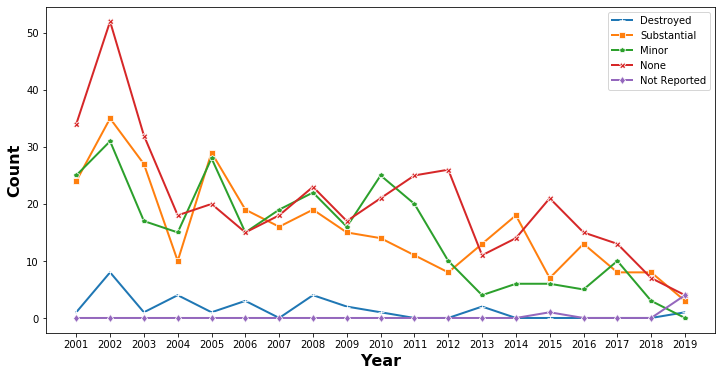

In [17]:
aircraft_DEST_res = aircraftResult[aircraftResult['damage'] == 'DEST'].sort_values(by=['ev_year'])
aircraft_SERS_res = aircraftResult[aircraftResult['damage'] == 'SUBS'].sort_values(by=['ev_year'])
aircraft_MINR_res = aircraftResult[aircraftResult['damage'] == 'MINR'].sort_values(by=['ev_year'])
aircraft_NONE_res = aircraftResult[aircraftResult['damage'] == 'NONE'].sort_values(by=['ev_year'])
aircraft_UNKN_res = aircraftResult[aircraftResult['damage'] == 'Not Reported'].sort_values(by=['ev_year'])

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(aircraft_DEST_res['ev_year'].values, aircraft_DEST_res['count'].values, marker = '+', lw = 2)
sns.lineplot(aircraft_SERS_res['ev_year'].values, aircraft_SERS_res['count'].values, marker = 's', lw = 2)
sns.lineplot(aircraft_MINR_res['ev_year'].values, aircraft_MINR_res['count'].values, marker = 'p', lw = 2)
sns.lineplot(aircraft_NONE_res['ev_year'].values, aircraft_NONE_res['count'].values, marker = 'X', lw = 2)
sns.lineplot(aircraft_UNKN_res['ev_year'].values, aircraft_UNKN_res['count'].values, marker = 'd', lw = 2)
plt.legend(['Destroyed', 'Substantial', 'Minor', 'None', 'Not Reported'])
plt.xlabel('Year', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count', fontsize = 16, fontweight = 'bold')
plt.savefig('damage_vs_year.pdf')

##### Injury VS year

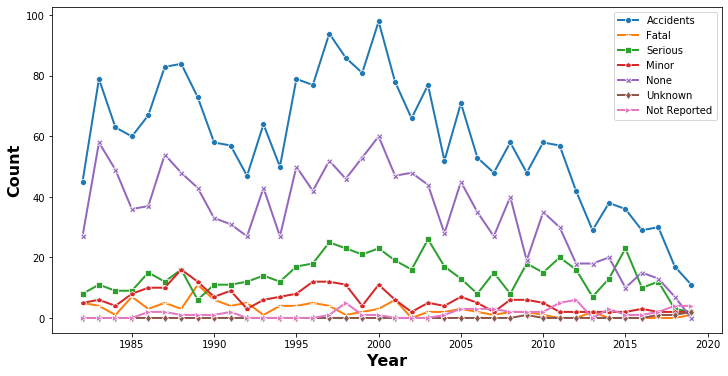

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

noEventsbyYear = events_part['ev_year'].groupby(events_part['ev_year'].rename('year')).agg({'count'})
sns.lineplot(No_Report_res['ev_year'].values, noEventsbyYear['count'], marker = 'o', lw = 2)

sns.lineplot(FATL_res['ev_year'].values, FATL_res['count'].values, marker = '+', lw = 2)
sns.lineplot(SERS_res['ev_year'].values, SERS_res['count'].values, marker = 's', lw = 2)
sns.lineplot(MINR_res['ev_year'].values, MINR_res['count'].values, marker = 'p', lw = 2)
sns.lineplot(NONE_res['ev_year'].values, NONE_res['count'].values, marker = 'X', lw = 2)
sns.lineplot(UNKN_res['ev_year'].values, UNKN_res['count'].values, marker = 'd', lw = 2)
sns.lineplot(No_Report_res['ev_year'].values, No_Report_res['count'].values, marker = '>', lw = 2)

plt.xlabel('Year', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count', fontsize = 16, fontweight = 'bold')
plt.legend(['Accidents', 'Fatal', 'Serious', 'Minor', 'None', 'Unknown', 'Not Reported'])
plt.savefig('injury_vs_year.pdf')

#### Accident vs Aircraft Manufactuer

In [19]:
acft_make_counter = collections.Counter(aircraft['acft_make'].str.title())
acft_make_counter_plot = {k: v for k, v in acft_make_counter.items() if v > 5}

Text(0, 0.5, 'No of accidents')

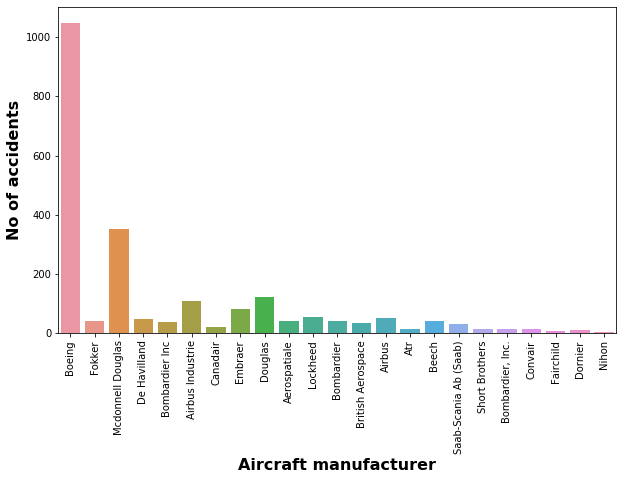

In [20]:
plt.figure(figsize = (10, 6))
sns.barplot(list(acft_make_counter_plot.keys()), list(acft_make_counter_plot.values()))
plt.xticks(rotation=90)
plt.xlabel('Aircraft manufacturer', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of accidents', fontsize = 16, fontweight = 'bold')

#### Accident vs Event Type

In [21]:
ev_type_counter = collections.Counter(events['ev_type'].fillna('Unknown'))
ev_type_keys = ['Accident','Incident','Unknown']

Text(0, 0.5, 'No of events')

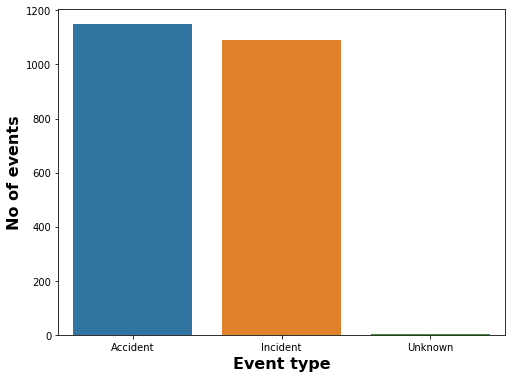

In [22]:
plt.figure(figsize = (8, 6))
sns.barplot(ev_type_keys, list(ev_type_counter.values()))
plt.xlabel('Event type', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Year

Text(0, 0.5, 'No of events')

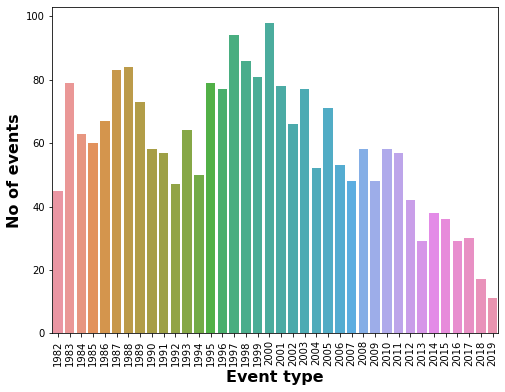

In [23]:
ev_year_counter = collections.Counter(events['ev_year'])

plt.figure(figsize = (8, 6))
sns.barplot(list(ev_year_counter.keys()), list(ev_year_counter.values()))
plt.xticks(rotation=90)
plt.xlabel('Event type', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs State

Text(0, 0.5, 'No of events')

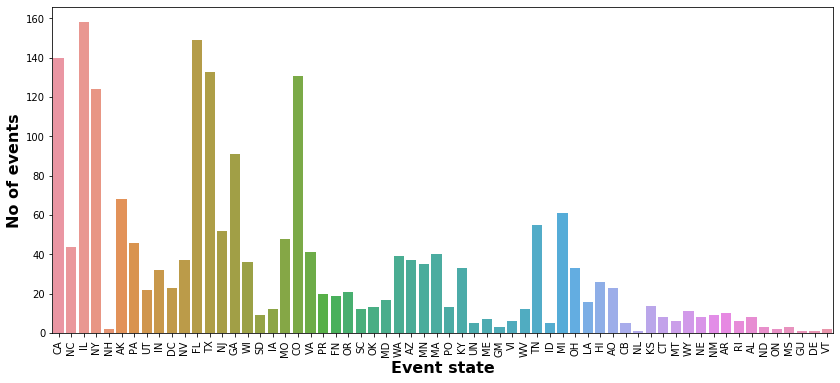

In [24]:
ev_state_counter = collections.Counter(events['ev_state'])

plt.figure(figsize = (14, 6))
sns.barplot(list(ev_state_counter.keys()), list(ev_state_counter.values()))
plt.xticks(rotation=90)
plt.xlabel('Event state', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Wind Gusting

In [25]:
gust_ind_counter = collections.Counter(events['gust_ind'].fillna('Not Reported'))
gust_ind_keys = ['Not Gusting', 'Gusting', 'Unknown', 'Not Reported']

Text(0, 0.5, 'No of events')

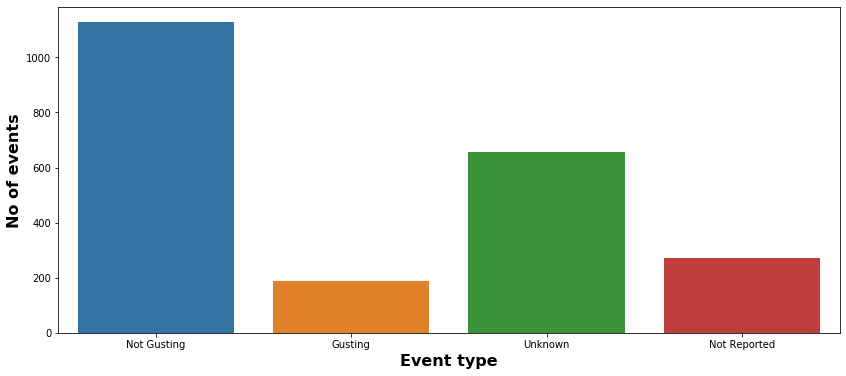

In [26]:
plt.figure(figsize = (14, 6))
sns.barplot(gust_ind_keys, list(gust_ind_counter.values()))
plt.xlabel('Event type', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Airport Elevation

In [27]:
elevation = events['apt_elev'].values
elevation = elevation[~np.isnan(elevation)]

Text(0, 0.5, 'Probability')

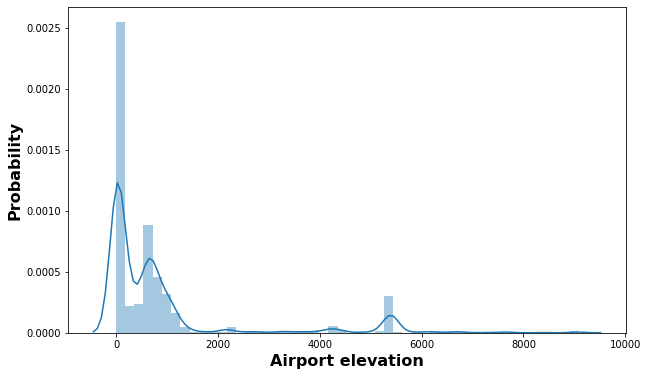

In [28]:
plt.figure(figsize = (10, 6))
sns.distplot(elevation)
plt.xlabel('Airport elevation', fontsize = 16, fontweight = 'bold')
plt.ylabel('Probability', fontsize = 16, fontweight = 'bold')

#### Accident vs Highest Injury

Text(0, 0.5, 'No of events')

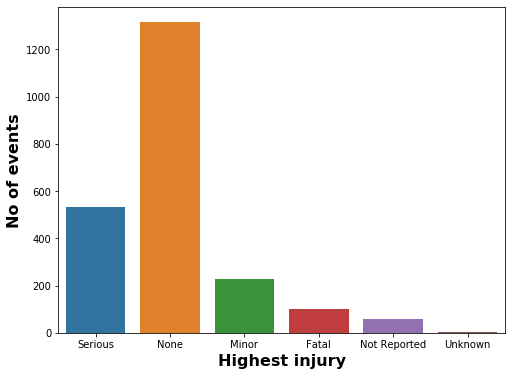

In [29]:
ev_highest_injury_counter = collections.Counter(events['ev_highest_injury'].fillna('Not Reported'))
ev_highest_injury_keys = ['Serious', 'None', 'Minor', 'Fatal', 'Not Reported', 'Unknown']

plt.figure(figsize = (8, 6))
sns.barplot(ev_highest_injury_keys, list(ev_highest_injury_counter.values()))
plt.xlabel('Highest injury', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Aircraft Damage

In [30]:
ev_aircraft_damage_counter = collections.Counter(aircraft['damage'].fillna('Not Reported'))
ev_aircraft_damage_counter

Counter({'NONE': 918,
         'SUBS': 543,
         'MINR': 749,
         'DEST': 88,
         'Not Reported': 5,
         'UNK': 5})

#### Accident vs Location

Text(0, 0.5, 'No of events')

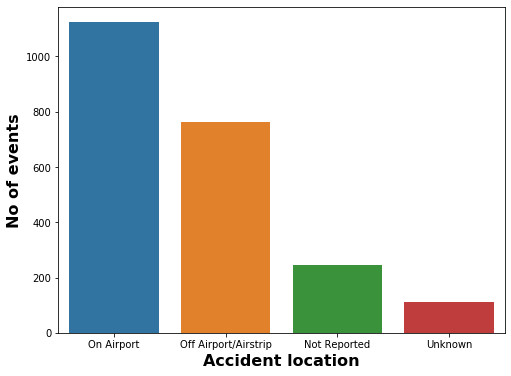

In [31]:
ev_nr_apt_loc_counter = collections.Counter(events['ev_nr_apt_loc'].fillna('Not Reported'))
ev_nr_apt_loc_keys = ['On Airport', 'Off Airport/Airstrip', 'Not Reported', 'Unknown']

plt.figure(figsize = (8, 6))
sns.barplot(ev_nr_apt_loc_keys, list(ev_nr_apt_loc_counter.values()))
plt.xlabel('Accident location', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Light Condition

In [32]:
light_cond_counter = collections.Counter(events['light_cond'].fillna('Unknown'))

light_cond_keys = ['Day','Night/Dark','Night', 'Not Reported', 'Condition-Unknown', 'Dusk', 'Dawn', 'Night//Bright']

Text(0, 0.5, 'No of events')

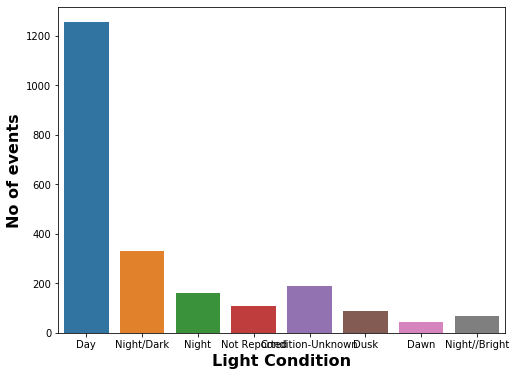

In [33]:
plt.figure(figsize = (8, 6))
sns.barplot(light_cond_keys, list(light_cond_counter.values()))
plt.xlabel('Light Condition', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Engine Type

In [34]:
eng_type_counter = collections.Counter(engines['eng_type'].fillna('Not Reported'))
eng_type_keys = ['Turbo Fan', 'Turbo Prop', 'Unknown', 'Turbo Jet', 'Reciprocating', 'Not Reported', 'Turbo Shaft']

Text(0, 0.5, 'No of events')

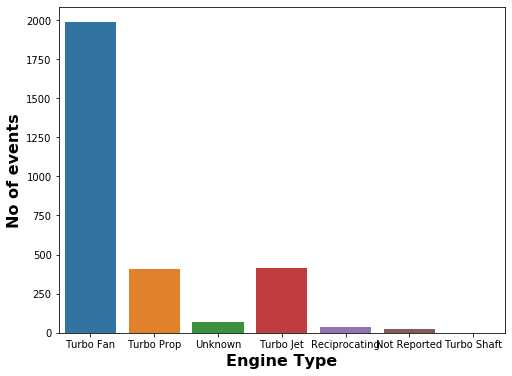

In [35]:
plt.figure(figsize = (8, 6))
sns.barplot(eng_type_keys, list(eng_type_counter.values()))
plt.xlabel('Engine Type', fontsize = 16, fontweight = 'bold')
plt.ylabel('No of events', fontsize = 16, fontweight = 'bold')

#### Accident vs Airframe Hours

Text(0, 0.5, 'Probability')

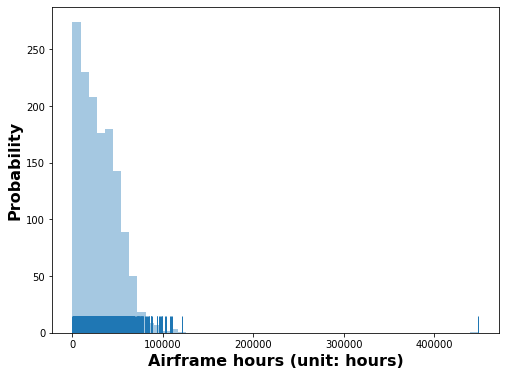

In [36]:
afm_hrs = aircraft['afm_hrs'].values
afm_hrs = afm_hrs[~np.isnan(afm_hrs)]

plt.figure(figsize = (8, 6))
sns.distplot(afm_hrs, kde=False, rug=True)
plt.xlabel('Airframe hours (unit: hours)', fontsize = 16, fontweight = 'bold')
plt.ylabel('Probability', fontsize = 16, fontweight = 'bold')

#### Aircraft Basic Characteristics

In [37]:
aircraft['num_eng']

0       2.0
1       2.0
2       3.0
3       2.0
4       4.0
       ... 
2303    2.0
2304    NaN
2305    2.0
2306    2.0
2307    2.0
Name: num_eng, Length: 2308, dtype: float64

In [38]:
aircraft['oper_pax_cargo']

0        PAX
1       CARG
2       PACA
3       PACA
4       PACA
        ... 
2303     PAX
2304     PAX
2305     PAX
2306     PAX
2307     PAX
Name: oper_pax_cargo, Length: 2308, dtype: object

In [39]:
events['light_cond']

0       DAYL
1       DAYL
2       DAYL
3       DAYL
4       DAYL
        ... 
2238    DAYL
2239      NR
2240    NITE
2241    DAYL
2242    DAYL
Name: light_cond, Length: 2243, dtype: object

In [40]:
import pygraphviz as pgv
from IPython.display import display, Image

def drawImage(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

def drawPDF(dot, fileName):
    return pgv.AGraph(dot).draw(fileName + '.pdf', prog='dot')

## Build Bayesian Network from Event Sequences

In [41]:
ev_ID

['20001208X05312',
 '20150605X52542',
 '20071128X01867',
 '20001211X16206',
 '20001213X25382',
 '20051206X01938',
 '20001214X36146',
 '20001207X03251',
 '20001207X04196',
 '20001212X20332',
 '20070502X00501',
 '20001214X37407',
 '20001208X09076',
 '20180913X21320',
 '20020917X01911',
 '20001213X29927',
 '20001205X00149',
 '20001214X43381',
 '20001213X34548',
 '20020906X01547',
 '20070817X01201',
 '20171226X41907',
 '20001212X18366',
 '20100616X60229',
 '20081003X62958',
 '20050502X00534',
 '20131018X11441',
 '20140714X45633',
 '20001214X44830',
 '20001214X44795',
 '20120221X32033',
 '20001208X07016',
 '20001213X32507',
 '20001207X03788',
 '20001213X28762',
 '20010821X01745',
 '20030128X00117',
 '20001206X02536',
 '20020625X00967',
 '20120207X35615',
 '20090115X73226',
 '20100811X20501',
 '20001213X32186',
 '20001213X27298',
 '20001211X09482',
 '20010405X00701',
 '20001206X02715',
 '20020123X00105',
 '20020408X00474',
 '20190214X42337',
 '20040419X00477',
 '20001208X08613',
 '20001208X0

In [42]:
import re
def calculate_injury_level(ev_ID):    
    Fatal = sum(injury[(injury['ev_id'] == sample_ev_ID) & (injury['injury_level'] == 'FATL')]['inj_person_count'].values)
    Serious = sum(injury[(injury['ev_id'] == sample_ev_ID) & (injury['injury_level'] == 'SERS')]['inj_person_count'].values)
    Minor = sum(injury[(injury['ev_id'] == sample_ev_ID) & (injury['injury_level'] == 'MINR')]['inj_person_count'].values)
    No = sum(injury[(injury['ev_id'] == sample_ev_ID) & (injury['injury_level'] == 'NONE')]['inj_person_count'].values)
    Total = sum(injury[(injury['ev_id'] == sample_ev_ID) & (injury['injury_level'] == 'TOTL')]['inj_person_count'].values)
    
    dict_injury = {}
    if Total != 0:
        dict_injury['Fatal'] = Fatal/Total
        dict_injury['Serious'] = Serious/Total
        dict_injury['Minor'] = Minor/Total
        dict_injury['NONE'] = No/Total
        
        if dict_injury['Fatal'] > 0:
            return 'Fatalinjury'
        elif dict_injury['Serious'] > 0:
            return 'Seriousinjury'
        elif dict_injury['Minor'] > 0:
            return 'Minorinjury'
        else:
            return 'Noinjury'
    else:
        return 'Noinjury'

def deriveNamebyCode(code):
    try:
        label = metaData[metaData['code_iaids'] == code]['meaning'].values[0]
        name = re.sub('[^a-zA-Z]+', '', label)  
    except:
        return 'Unknownquantity', 'Unknown quantity'
    
    return name, label

In [43]:
#sample_ev_ID = '20001213X29335'
sample_ev_ID = '20001213X27734'
example = narratives[narratives['ev_id'] == sample_ev_ID]
list(example['narr_accp'])

[nan]

In [44]:
sample_ev_ID

'20001213X27734'

In [45]:
seq_of_events[seq_of_events['ev_id'] == sample_ev_ID]

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
117244,20001213X27734,1,1,1,1,10510,F,1205,0.0,12/13/2000 12:29:40,dbo
117245,20001213X27734,1,1,2,2,24102,F,3115,4107.0,12/13/2000 12:29:40,dbo
117246,20001213X27734,1,1,3,1,10003,F,1163,0.0,12/13/2000 12:29:40,dbo
117247,20001213X27734,1,1,4,2,24010,C,3109,4000.0,12/13/2000 12:29:40,dbo
117248,20001213X27734,1,1,5,2,24527,F,3102,4001.0,12/13/2000 12:29:40,dbo
117249,20001213X27734,1,1,6,2,24624,F,3136,4000.0,12/13/2000 12:29:40,dbo
117250,20001213X27734,1,1,7,2,23308,C,3110,4000.0,12/13/2000 12:29:40,dbo
117251,20001213X27734,1,1,8,3,33211,C,0,4000.0,7/19/2001 10:05:41,dbo


In [46]:
occurrences[occurrences['ev_id'] == sample_ev_ID]

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Phase_of_Flight,Altitude,lchg_date,lchg_userid
59883,20001213X27734,1,1,430,530,0,12/13/2000 12:29:40,dbo


In [47]:
a = set(occurrences[occurrences['Occurrence_Code'] == 340]['ev_id'].values)
ids = a.intersection(set(ev_ID))

In [48]:
aircraft[aircraft['ev_id'] == sample_ev_ID]['afm_hrs']

989    37823.0
Name: afm_hrs, dtype: float64

In [49]:
dictEdges = {}

lst = ['eventId', 'from', 'to']
df_records = pd.DataFrame(columns=lst)

def addEdges(key, ev_ID):
    if key in dictEdges.keys():
        dictEdges[key] += 1
    else:
        dictEdges[key] = 1
    
    global df_records
    fromNode, toNode = key.split('->')
    row = {'eventId': ev_ID, 'from': fromNode, 'to': toNode}
    df_records = df_records.append(row, ignore_index=True)
        
dictNodeLabel = {}
def addNodeLabel(key, value):
    if key == 'Flightcrew':
        dictNodeLabel[key] = 'Flight crew'
        return
    if key not in dictNodeLabel.keys():
        dictNodeLabel[key] = value
        
dictNodeLabel['Fatalinjury'] = 'Fatal injury'
dictNodeLabel['Seriousinjury'] = 'Serious injury'
dictNodeLabel['Minorinjury'] = 'Minor injury'
dictNodeLabel['Noinjury'] = 'No injury'
dictNodeLabel['Unknownreason'] = 'Unknown reason'

In [50]:
def buildOneGraphRep(sample_ev_ID):
    subjectName = []

    g1 = "digraph top {"
    g1 += """size ="12,12"; """
    g1 += "graph [compound=true];"

    ev_year = events[events['ev_id'] == sample_ev_ID]['ev_year'].values[0]
    if ev_year <= 2006:
        eventSequences = seq_of_events[seq_of_events['ev_id'] == sample_ev_ID][['Occurrence_No', 'seq_event_no', 'Subj_Code', 
                                                                                'Modifier_Code', 'Person_Code']]
        ## Construct the subject name
        subjectList = []
        for index, row in eventSequences.iterrows():
            Subj_Code = str(int(row['Subj_Code']))
            Modifier_Code = str(int(row['Modifier_Code']))
            Person_Code = str(int(row['Person_Code']))
            Occurrence_No = int(row['Occurrence_No'])

            subjectName, subjectLabel = deriveNamebyCode(Subj_Code)
            
            if Modifier_Code != '0':
                modifierName, modifierLabel = deriveNamebyCode(Modifier_Code)
                
                if len(modifierName) > 0:
                    #subjectName = subjectName + modifierName
                    subjectLabel = subjectLabel + ':' + modifierLabel

            g1 += subjectName + ' [label =' + '"' + subjectLabel + '"'+ '];'
            subjectList.append([Occurrence_No, subjectName])
            addNodeLabel(subjectName, subjectLabel)

            if Person_Code != '0':
                personName, personeLabel = deriveNamebyCode(Person_Code)
                g1 += personName + '[label = ' + '"' + personeLabel + '"' + '];'
                g1 += personName + '->' + subjectName + ';'
                addEdges(personName + '->' + subjectName, sample_ev_ID)
                addNodeLabel(personName, personeLabel)

        ## construct sequence of occurrence
        eventOccurrences = occurrences[occurrences['ev_id'] == sample_ev_ID][['Occurrence_Code', 'Phase_of_Flight']]
        occurrenceCount = 0
        OccurrenceName = ''
        
        for index, row in eventOccurrences.iterrows():
            Occurrence_Code = str(row['Occurrence_Code'])
            Phase_of_Flight = str(row['Phase_of_Flight'])

            prevOccurrence = OccurrenceName
            OccurrenceName, OccurrenceLabel  = deriveNamebyCode(Occurrence_Code)
            flightPhaseName, flightPhaseLabel = deriveNamebyCode(Phase_of_Flight)

            g1 += OccurrenceName + ' [label = ' + '"' + OccurrenceLabel + '"' + ', style=filled, color=".2 .5 0.9"];'
            addNodeLabel(OccurrenceName, OccurrenceLabel)
            addNodeLabel(flightPhaseName, flightPhaseLabel)
            
            for subject in subjectList:
                if subject[0] == occurrenceCount + 1:
                    connection = subject[1] + '->' + OccurrenceName + ';'
                    if connection not in g1:
                        g1 += subject[1] + '->' + OccurrenceName + ';'
                        addEdges(subject[1] + '->' + OccurrenceName, sample_ev_ID)
            
            if occurrenceCount == 0:
                #g1 += flightPhaseName + ' [label = ' + '"' + flightPhaseLabel + '"' + '];'
                #g1 += flightPhaseName + '->' + OccurrenceName + ';'
                #addEdges(flightPhaseName + '->' + OccurrenceName)
                pass
            
            if occurrenceCount >= 1:
                g1 += prevOccurrence + '->' + OccurrenceName + ';'
                #g1 += flightPhaseName + ' [label = ' + '"' + flightPhaseLabel + '"' + '];'
                #g1 += flightPhaseName + '->' + OccurrenceName + ';'
                
                addEdges(prevOccurrence + '->' + OccurrenceName, sample_ev_ID)
                #addEdges(flightPhaseName + '->' + OccurrenceName)

            occurrenceCount += 1

        ## Outcome of accident
        aircraftDamageLevel = aircraft[aircraft['ev_id'] == sample_ev_ID]['damage'].values[0]
        aircraftDamageName = dictAircraftDamage[aircraftDamageLevel] + 'aircraftdamage'
        aircraftDamageLabel = dictAircraftDamage[aircraftDamageLevel] + ' aircraft damage'
        addNodeLabel(aircraftDamageName, aircraftDamageLabel)
        
        g1 += aircraftDamageName + '[label = ' + '"'+ aircraftDamageLabel + '"' +', style=filled];'
        
        if OccurrenceName == '':
            OccurrenceName = 'Unknownreason'
            
        g1 += OccurrenceName + '->' + aircraftDamageName + ';'
        addEdges(OccurrenceName + '->' + aircraftDamageName, sample_ev_ID)

        injuryLevel = calculate_injury_level(sample_ev_ID)
        
        g1 += injuryLevel + '[label = ' + '"'+ dictNodeLabel[injuryLevel] + '"' +', style=filled];'
        g1 += OccurrenceName + '->' + injuryLevel + ';'
        addEdges(OccurrenceName + '->' + injuryLevel, sample_ev_ID)

        g1 += "}"
        
        return g1

In [51]:
injuryLevel = calculate_injury_level(sample_ev_ID)
dictNodeLabel[injuryLevel]

'Fatal injury'

#### Demo

In [52]:
sample_ev_ID

'20001213X27734'

In [53]:
aircraft[aircraft['ev_id'] == sample_ev_ID]['damage']

989    NONE
Name: damage, dtype: object

In [54]:
dictAircraftDamage = {'MINR': 'Minor', 'DEST': 'Destroyed', 'NONE': 'None', 'UNK': 'Unknown', 'SUBS': 'Substantial'}
dictEdges = {}
g1 = buildOneGraphRep(sample_ev_ID)
drawImage(g1)
drawPDF(g1, 'test')

#### Add all the connections for accidents before 2006

In [55]:
dictEdges = {}
for sample_ev_ID in ev_ID:
    #print (sample_ev_ID)
    buildOneGraphRep(sample_ev_ID)

In [56]:
### create the contribution of each individual element
df_records[df_records['from'] == 'Climb']

,eventId,from,to
10,20001213X27734,Climb,Miscellaneousother
4461,20001213X27734,Climb,Miscellaneousother


In [57]:
setCauses = set(df_records['from'].values)

dictElement = {}

for cause in setCauses:
    outcomes = set(df_records[(df_records['from'] == cause)]['to'].values)
    
    for outcome in outcomes:
        #print ('no causes: ', no_causes)

        key = cause + '->' + outcome

        jointEvents = set(df_records[(df_records['to'] == outcome) & (df_records['from'] == cause)]['eventId'].values)
        denominator = set(df_records[(df_records['from'] == cause) | (df_records['to'] == cause)]['eventId'].values)

        if key not in dictElement.keys():
            dictElement[key] = len(jointEvents)/len(denominator)

In [58]:
dictElement

{'Explosion->Airframecomponentsystemfailuremalfunction': 0.5,
 'Explosion->Forcedlanding': 0.5,
 'Aircraftequipmentinadequateairframe->Airframecomponentsystemfailuremalfunction': 1.0,
 'FAAairwaysfacilitypersonnel->Facilityinadequateinstrumentlocation': 1.0,
 'Correctinglensesnotworn->Nearcollisionbetweenaircraft': 1.0,
 'Flightcontrols->Abruptmaneuver': 0.2857142857142857,
 'Flightcontrols->Draggedwingrotorpodfloatortailskid': 0.14285714285714285,
 'Flightcontrols->Lossofcontrolinflight': 0.42857142857142855,
 'Flightcontrols->Hardlanding': 0.14285714285714285,
 'Autopilot->Lossofcontrolinflight': 0.375,
 'Autopilot->Lossofcontrolongroundwater': 0.125,
 'Autopilot->Abruptmaneuver': 0.125,
 'Autopilot->Altitudedeviationuncontrolled': 0.25,
 'Autopilot->Lossofenginepower': 0.125,
 'Flightnavigationinstrumentsattitudegyro->Lossofcontrolinflight': 1.0,
 'Flightcontrolsystemelevatorcontrolcablerod->Airframecomponentsystemfailuremalfunction': 1.0,
 'Enginecompartment->Fireexplosion': 0.2857

In [59]:
setCauses

{'ATCclearance',
 'ATCpersonnelAirRouteTrafficControlCenterARTCC',
 'ATCpersonnelFlightServiceStationFSS',
 'ATCpersonneldepartureapproach',
 'ATCpersonnellocalgroundclearancedelivery',
 'ATCpersonnelnonFAA',
 'ATCpersonnelsupervisor',
 'Abort',
 'AbortaboveV',
 'Abortedlanding',
 'Abortedtakeoff',
 'Abruptmaneuver',
 'Accessorydriveassembly',
 'Accessorydriveassemblydrivegear',
 'Accessorydriveassemblydriveshaft',
 'Accessorydriveassemblyextensionunit',
 'Accessorydriveassemblyexternalshaftbearing',
 'Aileron',
 'Ailerontrim',
 'AirRouteTrafficControlCenterARTCCservice',
 'Airconditioningheatingpressurization',
 'Airconditioningheatingpressurizationcabintemperaturecontrol',
 'Airconditioningheatingpressurizationcontrolindicator',
 'Airconditioningheatingpressurizationfreonsystem',
 'Airconditioningheatingpressurizationoutflowvalve',
 'Airconditioningheatingpressurizationpressureregulator',
 'Airconditioningheatingpressurizationsafetyvalve',
 'Aircraftcontrol',
 'Aircraftequipmentinade

In [60]:
dictEdges

{'Passenger->Evacuation': 14,
 'Hydraulicsystem->Airframecomponentsystemfailuremalfunction': 18,
 'Fluidhydraulic->Airframecomponentsystemfailuremalfunction': 16,
 'Airconditioningheatingpressurization->Airframecomponentsystemfailuremalfunction': 18,
 'Evacuation->Miscellaneousother': 24,
 'Airframecomponentsystemfailuremalfunction->Miscellaneousother': 34,
 'Miscellaneousother->Minoraircraftdamage': 46,
 'Miscellaneousother->Seriousinjury': 78,
 'Electricalsystemelectricwiring->Airframecomponentsystemfailuremalfunction': 13,
 'Fuselagecabin->Airframecomponentsystemfailuremalfunction': 13,
 'Airframecomponentsystemfailuremalfunction->Minoraircraftdamage': 131,
 'Airframecomponentsystemfailuremalfunction->Noinjury': 231,
 'Windowcabin->Decompression': 1,
 'Decompression->Minoraircraftdamage': 8,
 'Decompression->Minorinjury': 3,
 'Companymaintenancepersonnel->Maintenanceoverhaul': 8,
 'Landinggearmaingear->Airframecomponentsystemfailuremalfunction': 12,
 'Maintenanceoverhaul->Airframeco

In [61]:
len(dictElement)

3634

In [62]:
len(dictEdges)

3634

#### Construct a dataframe to represent all the links in the network

In [63]:
lst = ['name', 'fromID', 'toID', 'count']
df_edges = pd.DataFrame(columns = lst)

for key, value in dictEdges.items():
    name = key
    fromID, toID = str(key).split('->')
    count = dictElement[key]
    
    row = {'name': key, 'fromID': fromID, 'toID': toID, 'count': count}
    df_edges = df_edges.append(row, ignore_index=True)

In [64]:
df_records[df_records['to'] == 'Ongroundwaterencounterwithweather']

,eventId,from,to
913,20001213X29644,Weatherevaluation,Ongroundwaterencounterwithweather
914,20001213X29644,Supervision,Ongroundwaterencounterwithweather
915,20001213X29644,Proceduresdirectives,Ongroundwaterencounterwithweather
916,20001213X29644,Weathercondition,Ongroundwaterencounterwithweather
3585,20001208X05750,Lightcondition,Ongroundwaterencounterwithweather
3586,20001208X05750,Weathercondition,Ongroundwaterencounterwithweather
3587,20001208X05750,Flightintoadverseweather,Ongroundwaterencounterwithweather
3588,20001208X05750,Visualauralperception,Ongroundwaterencounterwithweather
7178,20001206X00615,Terraincondition,Ongroundwaterencounterwithweather
11905,20001213X30439,Weathercondition,Ongroundwaterencounterwithweather


In [65]:
parentInfo = df_edges[df_edges['toID'] == 'Ongroundwaterencounterwithweather'][['fromID', 'count']].values
parentInfo

array([['Weatherevaluation', 0.043478260869565216],
       ['Supervision', 0.018867924528301886],
       ['Proceduresdirectives', 0.012987012987012988],
       ['Weathercondition', 0.007371007371007371],
       ['Lightcondition', 0.00819672131147541],
       ['Flightintoadverseweather', 0.05263157894736842],
       ['Visualauralperception', 0.07142857142857142],
       ['Terraincondition', 0.01020408163265306],
       ['Windinformation', 0.3333333333333333],
       ['Overconfidenceinpersonalability', 0.2],
       ['Aircraftperformancetakeoffcapability', 0.3333333333333333],
       ['Overconfidenceinaircraftsability', 1.0],
       ['Instructionswrittenverbal', 0.024390243902439025]], dtype=object)

In [66]:
df_edges[df_edges['toID'] == 'Ongroundwaterencounterwithweather']

,name,fromID,toID,count
576,Weatherevaluation->Ongroundwaterencounterwithw...,Weatherevaluation,Ongroundwaterencounterwithweather,0.043478
577,Supervision->Ongroundwaterencounterwithweather,Supervision,Ongroundwaterencounterwithweather,0.018868
578,Proceduresdirectives->Ongroundwaterencounterwi...,Proceduresdirectives,Ongroundwaterencounterwithweather,0.012987
579,Weathercondition->Ongroundwaterencounterwithwe...,Weathercondition,Ongroundwaterencounterwithweather,0.007371
1590,Lightcondition->Ongroundwaterencounterwithweather,Lightcondition,Ongroundwaterencounterwithweather,0.008197
1591,Flightintoadverseweather->Ongroundwaterencount...,Flightintoadverseweather,Ongroundwaterencounterwithweather,0.052632
1592,Visualauralperception->Ongroundwaterencounterw...,Visualauralperception,Ongroundwaterencounterwithweather,0.071429
2512,Terraincondition->Ongroundwaterencounterwithwe...,Terraincondition,Ongroundwaterencounterwithweather,0.010204
3413,Windinformation->Ongroundwaterencounterwithwea...,Windinformation,Ongroundwaterencounterwithweather,0.333333
3414,Overconfidenceinpersonalability->Ongroundwater...,Overconfidenceinpersonalability,Ongroundwaterencounterwithweather,0.200000


### Construct Bayesian network with PySMILE library

#### Construct XDSL file to be fed into PySMILE

In [67]:
def binaryConversion(value, n):
    m = eval('"' + "{0:0" + str(n) + "b}" + '"').format(value) ## binary representation
    characters = [int(char) for char in str(m)]
    res = np.array(characters)
    return res

In [68]:
def constructCPT(parentInfo):
    n = parentInfo.shape[0]
    count = parentInfo[:, 1]
    count = count/sum(count)
    start = 2**n - 1
    
    print (count)
    CPT = []
    for i in range(start, -1, -1):
        scheme = binaryConversion(i, n)
        Yes_prob = np.sum(np.multiply(scheme, count))/np.sum(count)
        No_prob = 1 - Yes_prob
        CPT.append(Yes_prob)
        CPT.append(No_prob)
    
    return CPT

def occurrenceTimes(toID):
    toID = set(df_records[df_records['to'] == toID]['eventId'].values)
    fromID = set(df_records[df_records['from'] == toID]['eventId'].values)
    return len(toID.union(fromID))

def occurrenceTimesFromID(fromID):
    return len(set(df_records[df_records['from'] == fromID]['eventId'].values))

##### Load the license

In [69]:
import pysmile

## load license
pysmile.License((
    b"SMILE LICENSE cd06be93 97a7a599 29f4a47f "
    b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
    b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
    b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
    b"SOFTWARE LICENSING AGREEMENT. "
    b"Serial #: ckw9n4254hey3kiszvj6n5k0b "
    b"Issued for: Xiaoge Zhang (zxgcqupt@gmail.com) "
    b"Academic institution: Vanderbilt University "
    b"Valid until: 2020-03-22 "
    b"Issued by BayesFusion activation server"
    ),[
    0xf5,0xdc,0x56,0x91,0x01,0x05,0xdb,0x8d,0xf0,0xbf,0x21,0xe9,0x58,0x09,0x41,0x79,
    0x1f,0xd8,0xd4,0xb3,0x0a,0xaf,0x09,0xad,0xf2,0x41,0x58,0x93,0xc2,0x51,0x28,0xb0,
    0x8d,0xad,0x69,0x38,0x8d,0x82,0x43,0x01,0xca,0xd9,0xd3,0xa2,0x5c,0x98,0xe2,0x9a,
    0x99,0xbf,0xa4,0x17,0x4f,0xbb,0xd6,0x9a,0x72,0xf4,0x23,0xf5,0xed,0x94,0x4b,0x8e])

##### Define the denominator to represent the number of flights from 1982 to 2006

In [70]:
dictEdges

{'Passenger->Evacuation': 14,
 'Hydraulicsystem->Airframecomponentsystemfailuremalfunction': 18,
 'Fluidhydraulic->Airframecomponentsystemfailuremalfunction': 16,
 'Airconditioningheatingpressurization->Airframecomponentsystemfailuremalfunction': 18,
 'Evacuation->Miscellaneousother': 24,
 'Airframecomponentsystemfailuremalfunction->Miscellaneousother': 34,
 'Miscellaneousother->Minoraircraftdamage': 46,
 'Miscellaneousother->Seriousinjury': 78,
 'Electricalsystemelectricwiring->Airframecomponentsystemfailuremalfunction': 13,
 'Fuselagecabin->Airframecomponentsystemfailuremalfunction': 13,
 'Airframecomponentsystemfailuremalfunction->Minoraircraftdamage': 131,
 'Airframecomponentsystemfailuremalfunction->Noinjury': 231,
 'Windowcabin->Decompression': 1,
 'Decompression->Minoraircraftdamage': 8,
 'Decompression->Minorinjury': 3,
 'Companymaintenancepersonnel->Maintenanceoverhaul': 8,
 'Landinggearmaingear->Airframecomponentsystemfailuremalfunction': 12,
 'Maintenanceoverhaul->Airframeco

In [71]:
reducedDictEdges = dict((k, v) for k, v in dictEdges.items() if v >= 5)
len(reducedDictEdges)

549

In [81]:
maxElements = 13

def searchThreshold(parentInfo):
    threshold = 0
    
    m = len(np.where(parentInfo[:, 1] > threshold)[0])
    
    while m > maxElements:
        if m < maxElements:
            threshold -= min(parentInfo[:, 1])
        else:
            threshold += min(parentInfo[:, 1])
   
        m = len(np.where(parentInfo[:, 1] > threshold)[0])
    
    if threshold > max(parentInfo[:, 1]):
        threshold = max(parentInfo[:, 1])
    
    return threshold

In [82]:
noFlights = 1e9 ### to be replaced by the actual number of flights within USA from 1982 to 2006
random.seed(2)
keyList = []

In [83]:
XDSL = """<?xml version="1.0" encoding="ISO-8859-1"?>
<!-- This network was created in GeNIe Academic, which can be used for educational and research purposes only -->
<smile version="1.0" id="Network1" numsamples="1000000000" discsamples="1000000000"> """

count = 0

nodeConstructor = "\n\t<nodes>"
extensions = '\n\t<extensions>'
extensions += """\n\t\t<genie version="1.0" app="GeNIe 2.4.4420.0 ACADEMIC" name="Network1" faultnameformat="nodestate">"""

networkNodes = set([])
dictSubmodel = {}

for key, value in dictEdges.items():
    fromID, toID = key.split('->')
    print (toID)
    parentInfo = df_edges[df_edges['toID'] == toID][['fromID', 'count']].values
    parentInfo[:, 1] = parentInfo[:, 1]/sum(parentInfo[:, 1])
    
    indexMaxValues = np.where(parentInfo[:, 1] == max(parentInfo[:, 1]))[0]
    noMaxValues = len(indexMaxValues)
    
    if noMaxValues > maxElements:
        ## inject jitter to the maxvalue
        jitter = [random.random() for i in range(noMaxValues)] 
        jitter = np.array(jitter) * min(parentInfo[:, 1])
        parentInfo[indexMaxValues, 1] = parentInfo[indexMaxValues, 1] + jitter
    
    n = parentInfo.shape[0]
    
    if n > maxElements:
        delta = searchThreshold(parentInfo)
        parentInfo = parentInfo[np.where(parentInfo[:, 1] >= delta), :][0]
        print ('delta: ', delta)
        parentNodeNames = list(parentInfo[:, 0]) 

        for fromID, count in parentInfo:
            if fromID not in networkNodes:
                ## compute prior probabilities
                Yes_prob = occurrenceTimesFromID(fromID)/noFlights
                No_prob = 1 - Yes_prob

                ## construct parent nodes
                nodeConstructor += "\n\t\t<cpt id=" + '"' + fromID + '"' + """>"""
                nodeConstructor += """\n\t\t\t<state id="Yes" />\n\t\t\t<state id="No" />"""
                nodeConstructor += "\n\t\t\t<probabilities>" + str(Yes_prob) + " " +  str(No_prob) + "</probabilities>"
                nodeConstructor += '\n\t\t</cpt>'

                ## add extensions for parent nodes
                extensions += "\n\t\t\t<node id=" +  '"' + fromID + '"' + ">"
                extensions += "\n\t\t\t\t<name>" + fromID + "</name>"
                extensions += """\n\t\t\t\t<interior color="e5f6f7" />"""
                extensions += """\n\t\t\t\t<outline color="000080" />"""
                extensions += """\n\t\t\t\t<font color="000000" name="Arial" size="8" />"""
                extensions += "\n\t\t\t\t<position> 250 160 426 251 </position>"
                extensions += """\n\t\t\t\t<barchart active="true" width="258" height="64" />"""
                extensions += "\n\t\t\t</node>"

                networkNodes.add(fromID)

        if toID not in networkNodes:
            ## build conditional probability table
            CPT = constructCPT(parentInfo)
            
            CPT_str = list(map(str, CPT))

            childDesp = "\n\t\t<cpt id=" + '"' + str(toID) + '"' + """>"""
            childDesp += """\n\t\t\t<state id="Yes" />\n\t\t\t<state id="No" />"""
            childDesp += "\n\t\t\t<parents>" + ' '.join(parentNodeNames) + "</parents>"
            childDesp += "\n\t\t\t<probabilities>"+ ' '.join(CPT_str)+"</probabilities>"
            childDesp += "\n\t\t</cpt>"

            nodeConstructor += childDesp
            networkNodes.add(toID)

            ## add child node
            extensions += "\n\t\t\t<node id=" +  '"' + toID + '"' + ">"
            extensions += "\n\t\t\t\t<name>" + toID + "</name>"
            extensions += """\n\t\t\t\t<interior color="e5f6f7" />"""
            extensions += """\n\t\t\t\t<outline color="000080" />"""
            extensions += """\n\t\t\t\t<font color="000000" name="Arial" size="8" />"""
            extensions += "\n\t\t\t\t<position> 250 160 426 251 </position>"
            extensions += """\n\t\t\t\t<barchart active="true" width="258" height="64" />"""
            extensions += "\n\t\t\t</node>"
nodeConstructor += "\n\t</nodes>"
extensions += '\n\t\t</genie>'
extensions += '\n\t</extensions>'

Evacuation
Airframecomponentsystemfailuremalfunction
delta:  0.005388376989582107
[1.0]
Airframecomponentsystemfailuremalfunction
delta:  0.005388269779929463
Airframecomponentsystemfailuremalfunction
delta:  0.005388352869435196
Miscellaneousother
delta:  0.011395075481551189
[1.0]
Miscellaneousother
delta:  0.011392319082055876
Minoraircraftdamage
delta:  0.03289251022566632
[0.06561951160334935 0.06561951160334935 0.0669061686936111
 0.09022682845460535 0.06374466841468222 0.1312390232066987
 0.06561951160334935 0.07655609687057424 0.06824429206748332
 0.08749268213779914 0.06561951160334935 0.08749268213779914
 0.06561951160334935]
Seriousinjury
delta:  0.016454089648624465
[0.08222026551716126 0.1811773402057702 0.15200935030626367
 0.15366522558193102 0.024865349002555617 0.07978771328292573
 0.037044295452786945 0.1296550340847543 0.02992039248109715
 0.08643668938983619 0.043218344694918094]
Airframecomponentsystemfailuremalfunction
delta:  0.005387557904495044
Airframecomponen

delta:  0.017545245425428808
Noneaircraftdamage
delta:  0.029461732109570888
Noinjury
delta:  0.029982191925945673
Compensationforwindconditions
Lossofcontrolongroundwater
delta:  0.021604461810741576
Lossofcontrolongroundwater
delta:  0.021604461810741576
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Nosegearcollapsed
delta:  0.021783527171855176
Substantialaircraftdamage
delta:  0.03336378310613939
Noinjury
delta:  0.029982191925945673
Aircraftcontrol
Lackoffamiliaritywithaircraft
Recoveryfrombouncedlanding
Hardlanding
delta:  0.02911403892769384
Hardlanding
delta:  0.02911403892769384
Hardlanding
delta:  0.02911403892769384
Draggedwingrotorpodfloatortailskid
delta:  0.028467022244400796
Draggedwingrotorpodfloatortailskid
delta:  0.028467022244400796
Substantialaircraftdamage
delta:  0.03336378310613939
Noinjury
delta:  0.029982191925945673
Miscellaneousother
delta:  0.011390885847281781
Noneair

Minorinjury
delta:  0.025818262104507612
Destroyedaircraftdamage
Fatalinjury
AirspeedrotationspeedVr
AirspeedliftoffspeedVlof
Liftoff
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Minoraircraftdamage
delta:  0.03289251022566632
Materialinadequate
Airframecomponentsystemfailuremalfunction
delta:  0.0053881623994313085
Airframecomponentsystemfailuremalfunction
delta:  0.005388320529741901
Airframecomponentsystemfailuremalfunction
delta:  0.0053881974439969815
Airframecomponentsystemfailuremalfunction
delta:  0.005388317086391362
Lossofenginepowertotalmechanicalfailuremalfunction
delta:  0.03315965094077296
Lossofenginepowertotalmechanicalfailuremalfunction
delta:  0.03315664721666608
Minoraircraftdamage
delta:  0.03289251022566632
Noinjury
delta:  0.0299821919259456

Seriousinjury
delta:  0.016454089648624465
Gearnotextended
delta:  0.01737891102679668
Gearnotextended
delta:  0.01737891102679668
Gearnotextended
delta:  0.01737891102679668
Noinjury
delta:  0.029982191925945673
Airframecomponentsystemfailuremalfunction
delta:  0.005388067097977583
Miscellaneousother
delta:  0.01139307292301532
Miscellaneousother
delta:  0.011388387528521362
Weatherevaluation
Supervision
Ongroundwaterencounterwithweather
Ongroundwaterencounterwithweather
Ongroundwaterencounterwithweather
Ongroundwaterencounterwithweather
Noneaircraftdamage
delta:  0.029461732109570888
Noinjury
delta:  0.029982191925945673
Miscellaneousother
delta:  0.011377782890197977
Visuallookout
Wrongrunway
Inattentive
Miscellaneousother
delta:  0.011381064354857844
Miscellaneousother
delta:  0.011384955561771154
Miscellaneousother
delta:  0.011394099837310065
Miscellaneousother
delta:  0.011382872327940951
Miscellaneousother
delta:  0.011393946702778861
Flightintoadverseweather
Wrongrunway
Visual

delta:  0.005387818168683126
Airframecomponentsystemfailuremalfunction
delta:  0.005388080376847993
Installation
Enginetearaway
Enginetearaway
Enginetearaway
Enginetearaway
Minoraircraftdamage
delta:  0.03289251022566632
Controltowerservice
Crewgroupcoordination
delta:  0.010990724348780373
Inadequatesurveillanceofoperationinsufficientstaff
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Maintenancelubrication
Informationinsufficient
Airframecomponentsystemfailuremalfunction
delta:  0.005388236303661711
Airframecomponentsystemfailuremalfunction
delta:  0.005388253737562125
Trafficadvisory
Ongroundwatercollisionwithobject
delta:  0.022272879072893957
Hydraulicsystem
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Emergencyprocedure
Abort
AbortaboveV
Airframecomponentsystemfail

delta:  0.011391980793385697
Miscellaneousother
delta:  0.011384927017447666
Removalofcontrolgustlocks
Airframecomponentsystemfailuremalfunction
delta:  0.005388332090133957
Airframecomponentsystemfailuremalfunction
delta:  0.005388337420185628
Airframecomponentsystemfailuremalfunction
delta:  0.005388269058088354
Aircraftcontrol
Ongroundwatercollisionwithobject
delta:  0.02226917544688879
Ongroundwatercollisionwithobject
delta:  0.02226125390415302
Properalignment
Draggedwingrotorpodfloatortailskid
delta:  0.028467022244400796
Draggedwingrotorpodfloatortailskid
delta:  0.028467022244400796
Draggedwingrotorpodfloatortailskid
delta:  0.028467022244400796
Draggedwingrotorpodfloatortailskid
delta:  0.028467022244400796
Minoraircraftdamage
delta:  0.03289251022566632
Explosion
Explosion
Airframecomponentsystemfailuremalfunction
delta:  0.005388358391758846
Destroyedaircraftdamage
Fatalinjury
Checklist
Monitoring
Draggedwingrotorpodfloatortailskid
delta:  0.028467022244400796
Draggedwingrot

delta:  0.023391796063150824
Fireexplosion
delta:  0.020269150601080175
Noinjury
delta:  0.029982191925945673
Crewgroupcoordination
delta:  0.010990724348780373
Visualseparation
Radarseparation
Abruptmaneuver
delta:  0.023391796063150824
Abruptmaneuver
delta:  0.023391796063150824
Abruptmaneuver
delta:  0.023391796063150824
Abruptmaneuver
delta:  0.023391796063150824
Abruptmaneuver
delta:  0.023391796063150824
Seriousinjury
delta:  0.016454089648624465
Maintenanceinstallation
Aircraftcontrol
Ongroundwatercollisionwithobject
delta:  0.022272606979742947
Airframecomponentsystemfailuremalfunction
delta:  0.005388058361153908
Identificationofaircraftvisually
Excessiveworkloadtaskoverload
Information
Divertedattention
Identificationofaircraftvisually
Ongroundwatercollisionwithobject
delta:  0.022270781895986646
Ongroundwatercollisionwithobject
delta:  0.022269640646123794
Ongroundwatercollisionwithobject
delta:  0.02227191182962659
Hazardousweatheradvisory
Windinformation
Hardlanding
delta:

Inflightcollisionwithobject
delta:  0.028880512812884104
Inflightcollisionwithobject
delta:  0.028880512812884104
Inflightcollisionwithobject
delta:  0.028880512812884104
Inflightcollisionwithobject
delta:  0.028880512812884104
Inflightcollisionwithobject
delta:  0.028880512812884104
Inflightcollisionwithobject
delta:  0.028880512812884104
Inflightcollisionwithobject
delta:  0.028880512812884104
Inflightcollisionwithterrainwater
delta:  0.020592805261196757
Lossofenginepowertotalnonmechanical
delta:  0.021450920052117062
Lossofenginepowertotalnonmechanical
delta:  0.021450920052117062
Lossofenginepowertotalnonmechanical
delta:  0.021450920052117062
Lossofenginepowertotalnonmechanical
delta:  0.021450920052117062
Groundloopswerve
Lossofcontrolongroundwater
delta:  0.021604461810741576
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Noneaircraftdamage
delta:  0.029461732109570888
Clearance
delta:  0.0030945031173106284
Pressure
Properglidepath
Overrun
delta:  0.017545

delta:  0.025310298216210326
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Minoraircraftdamage
delta:  0.03289251022566632
Minorinjury
delta:  0.025818262104507612
Informationinsufficient
InsufficientstandardsrequirementsManufacturer
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Instructionswrittenverbal
delta:  0.013550889722931279
Maintenanceserviceofaircraftequipment
Gearcollapsed
delta:  0.013279914066775304
Engineinstrument
Powerplantcontrols
Autopilot
Stall
Lossofenginepower
delta:  0.01468436983357496
Lossofenginepower
delta:  0.01468436983357496
Lossofenginepower
delta:  0.01468436983357496
Lossofenginepower
delta:  0.01468436983357496
Lossofenginepower
delta:  0.01468436983357

delta:  0.021604461810741576
Lossofcontrolongroundwater
delta:  0.021604461810741576
ATCclearance
Information
Miscellaneousother
delta:  0.01139270251424456
Miscellaneousother
delta:  0.011395749760097789
Miscellaneousother
delta:  0.011378214826912952
Weatherobservation
Leveloff
Hardlanding
delta:  0.02911403892769384
Hardlanding
delta:  0.02911403892769384
Hardlanding
delta:  0.02911403892769384
Minorinjury
delta:  0.025818262104507612
Lackoffamiliaritywithaircraft
Overrun
delta:  0.017545245425428808
Overrun
delta:  0.017545245425428808
Overrun
delta:  0.017545245425428808
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofenginepowertotalnonmechanical
delta:  0.021450920052117062
Lossofenginepowertotalnonmechanical
delta:  0.021450920052117062
Inflightcollisionwithterrainwate

Abruptmaneuver
delta:  0.023391796063150824
Abruptmaneuver
delta:  0.023391796063150824
Abruptmaneuver
delta:  0.023391796063150824
IFRseparationstandards
Improperdecision
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Maingearcollapsed
delta:  0.029116000951458745
Miscellaneousother
delta:  0.011393959776120796
Radarseparation
Aircraftpreflight
Miscellaneousother
delta:  0.011395581009769179
Maintenancereplacement
Airframecomponentsystemfailuremalfunction
delta:  0.0053883590915851905
Airframecomponentsystemfailuremalfunction
delta:  0.00538822768399969
Lackoftotalexperienceintypeoperation
Propellerblastorjetexhaustsuction
delta:  0.014460215522962843
Landinggeardownandlocked
Directionalcontrol
Airframecomponentsystemfailuremalfunction
delta:  0.005388283761247177
Draggedwingrotorpodfloatortailskid
delt

delta:  0.026022879838844215
Miscellaneousother
delta:  0.011386490849210435
Miscellaneousother
delta:  0.011394383482694177
Miscellaneousother
delta:  0.011391564784908834
Inflightencounterwithweather
delta:  0.031711008463822715
Inflightencounterwithweather
delta:  0.031711008463822715
Inflightencounterwithweather
delta:  0.031711008463822715
Forcedlanding
delta:  0.01792627124167145
Forcedlanding
delta:  0.01792627124167145
Forcedlanding
delta:  0.01792627124167145
Forcedlanding
delta:  0.01792627124167145
Overrun
delta:  0.017545245425428808
Overrun
delta:  0.017545245425428808
Miscellaneousother
delta:  0.011393327972018315
Maintenancereplacement
Materialdefectinadequatequalityofmaterial
Lossofenginepowerpartialmechanicalfailuremalfunction
delta:  0.02720723132905485
Lossofenginepowerpartialmechanicalfailuremalfunction
delta:  0.02720723132905485
Improperdecision
Improperuseofprocedure
Spoilerextension
Thrustreversers
Improperuseofequipmentaircraft
Lossofcontrolongroundwater
delta

Miscellaneousother
delta:  0.011394723934129849
Miscellaneousother
delta:  0.011395369045233085
Lossofenginepowertotalmechanicalfailuremalfunction
delta:  0.03315175459009848
Lossofenginepowertotalmechanicalfailuremalfunction
delta:  0.03316567698271816
Propellerfeathering
Informationunclear
Lossofenginepowerpartialmechanicalfailuremalfunction
delta:  0.02720723132905485
Lossofenginepowerpartialmechanicalfailuremalfunction
delta:  0.02720723132905485
Forcedlanding
delta:  0.01792627124167145
Forcedlanding
delta:  0.01792627124167145
Inflightcollisionwithterrainwater
delta:  0.020592805261196757
Lossofenginepowerpartialmechanicalfailuremalfunction
delta:  0.02720723132905485
Noneaircraftdamage
delta:  0.029461732109570888
Physicalimpairmenthypoglycemiadiet
Abruptmaneuver
delta:  0.023391796063150824
Abruptmaneuver
delta:  0.023391796063150824
Properglidepath
Lackofrecentexperienceintypeoperation
Inflightcollisionwithobject
delta:  0.028880512812884104
Inflightcollisionwithobject
delta: 

Inadequatetraining
CommunicationsinformationATC
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Instructionswrittenverbal
delta:  0.013550889722931279
Trafficadvisory
Collisionbetweenaircraftotherthanmidair
delta:  0.01611398849845064
Collisionbetweenaircraftotherthanmidair
delta:  0.01611398849845064
Proceduresdirectives
delta:  0.03452975373883736
Unsafehazardousconditionwarning
Airframecomponentsystemfailuremalfunction
delta:  0.005388146784554415
Miscellaneousother
delta:  0.011390832323051674
Flightadvisories
Insufficientstanda

delta:  0.02720723132905485
Lossofenginepowerpartialmechanicalfailuremalfunction
delta:  0.02720723132905485
NoticetoairmenNOTAMs
Collisionbetweenaircraftotherthanmidair
delta:  0.01611398849845064
Fatigueflightschedule
Fatiguelackofsleep
Habitinterference
Miscellaneousother
delta:  0.011390775426257186
Miscellaneousother
delta:  0.011393609551253984
Miscellaneousother
delta:  0.011380524967600553
Airgroundcommunications
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Fire
delta:  0.026022105859698195
Fire
delta:  0.026019549521367112
Fire
delta:  0.02602296108054537
Fire
delta:  0.02602302702963948
Fire
delta:  0.026021714744951605
Lossofenginepower
delta:  0.01468436983357496
Lossofenginepower
delta:  0.01468436983357496
Lossofenginepower
delta:  0.01468436983357496
Enginetearaway
Enginetearaway
Draggedwingrotorpodfloatortailskid
delta:  0.028467022244400796
Generator
Airframecomponentsystemfailuremalfunction
delta: 

delta:  0.019838221477307107
Lossofcontrolinflight
delta:  0.019838221477307107
Communications
Gearcollapsed
delta:  0.013279914066775304
Gearcollapsed
delta:  0.013279914066775304
Gearcollapsed
delta:  0.013279914066775304
Inadequatesurveillanceofoperationinadequateprocedure
Inflightcollisionwithterrainwater
delta:  0.020592805261196757
Weatherobservation
Crewgroupcoordination
delta:  0.010990724348780373
Ongroundwatercollisionwithobject
delta:  0.02227279612656977
Ongroundwatercollisionwithobject
delta:  0.022267550653275108
Ongroundwatercollisionwithobject
delta:  0.02226917264477525
Lossofenginepowertotalmechanicalfailuremalfunction
delta:  0.03315619612863802
Lossofenginepowertotalmechanicalfailuremalfunction
delta:  0.03316849447239565
Lossofenginepowertotalmechanicalfailuremalfunction
delta:  0.033158323221323206
Lossofenginepower
delta:  0.01468436983357496
Lossofenginepower
delta:  0.01468436983357496
Minorinjury
delta:  0.025818262104507612
Inadequatetrainingemergencyprocedur

Miscellaneousother
delta:  0.011393836771576012
Miscellaneousother
delta:  0.011390523578844184
Miscellaneousother
delta:  0.011392861412828881
Abruptmaneuver
delta:  0.023391796063150824
Properclimbrate
Inflightcollisionwithterrainwater
delta:  0.020592805261196757
Inflightcollisionwithterrainwater
delta:  0.020592805261196757
Inflightcollisionwithterrainwater
delta:  0.020592805261196757
Ongroundwatercollisionwithobject
delta:  0.02225888630215013
Checklist
Ongroundwatercollisionwithobject
delta:  0.022272263943331178
Poweronlanding
Forcedlanding
delta:  0.01792627124167145
Miscellaneous
Airframecomponentsystemfailuremalfunction
delta:  0.005387907415432822
Altitudeclearance
Airframecomponentsystemfailuremalfunction
delta:  0.005388136621417506
Airframecomponentsystemfailuremalfunction
delta:  0.005388078146081226
Airframecomponentsystemfailuremalfunction
delta:  0.005387716536199642
Airframecomponentsystemfailuremalfunction
delta:  0.005388226574313653
Miscellaneousother
delta:  0.0

Unsafehazardouscondition
Operationwithknowndeficienciesinequipment
Airframecomponentsystemfailuremalfunction
delta:  0.005388011366971672
Airframecomponentsystemfailuremalfunction
delta:  0.005388265652158314
Meteorologicalservice
Fire
delta:  0.0260183594121231
Fire
delta:  0.026020615709030095
Ongroundwatercollisionwithobject
delta:  0.022272540675915678
Lackoffamiliaritywithaircraft
Airframecomponentsystemfailuremalfunction
delta:  0.005388347429949048
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Ongroundwatercollisionwithterrainwater
delta:  0.025446587725618194
Lackoffamiliaritywithgeographicarea
Nearcollisionbetweenaircraft
delta:  0.025310298216210326
Runwaymaintenance
Overconfidenceinaircraftsability
Ongroundwaterencounterwithweather
Ongroundwaterencounterwithweather
Ongroundwaterencounterwithweather
Ongroundwaterencounterwithweather
Ongroundwaterencounterwithweather
Lossofcontrolonground

In [84]:
dictNodeLabel

{'Fatalinjury': 'Fatal injury',
 'Seriousinjury': 'Serious injury',
 'Minorinjury': 'Minor injury',
 'Noinjury': 'No injury',
 'Unknownreason': 'Unknown reason',
 'Doorinspection': 'Door, inspection:Not installed',
 'Maintenanceinspection': 'Maintenance, inspection:Inadequate',
 'Companymaintenancepersonnel': 'Company maintenance personnel',
 'Fuselagecabin': 'Fuselage, cabin:No pressure',
 'Inflightplanningdecision': 'In-flight planning/decision:Improper',
 'Pilotincommand': 'Pilot-in-command',
 'Climb': 'Climb:Continued',
 'unspecifiedperson': '(unspecified person)',
 'Crewgroupcoordination': 'Crew/group coordination:Poor',
 'Oxygensystem': 'Oxygen system:Improper use of',
 'Incapacitationanoxiahypoxia': 'Incapacitation (anoxia/hypoxia)',
 'Miscellaneousother': 'Miscellaneous/other',
 'Noneaircraftdamage': 'None aircraft damage',
 'Hydraulicsystem': 'Hydraulic system:Failure',
 'Fluidhydraulic': 'Fluid, hydraulic:Leak',
 'Airconditioningheatingpressurization': 'Air conditioning/heati

In [85]:
len(dictEdges)

3634

In [86]:
len(networkNodes)

519

In [87]:
XDSL += nodeConstructor
XDSL += extensions
XDSL += '\n</smile>'

In [88]:
### Write XDSL to file
file = open("NTSB.xdsl","w")
file.write(XDSL)

print (XDSL)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Perform Bayesian Inference

In [197]:
net = pysmile.Network()
net.read_file('NTSB.xdsl')

SMILEException: pysmile.Network.read_file raised exception!
errno = -103
Logged information: Error at 1, 0 while loading NTSB.xdsl: no element found


#### Before the evidence

In [395]:
parentNode = net.get_node('LandinggearnormalretractionextensionassemblyFailuretotal')
child_ids = net.get_child_ids(parentNode)

for i in child_ids:
    childNodeNames = net.get_node_name(i)
    beliefs = net.get_node_value(i)
    
    print (childNodeNames)
    for j in range(0, len(beliefs)):
        print(net.get_outcome_id(i, j) + "=" + str(beliefs[j]))

Gear not retracted
Yes=4.000000000000001e-09
No=0.9999999960000001


#### Setting the evidence

In [396]:
net.set_evidence("LandinggearnormalretractionextensionassemblyFailuretotal", "Yes")
net.set_evidence("LandinggearmaingearMovementrestricted", 'Yes')
net.set_evidence("MaintenancemajorrepairImproper", 'Yes')
net.update_beliefs()

child_ids = net.get_child_ids(parentNode)
for i in child_ids:
    childNodeNames = net.get_node_name(i)
    beliefs = net.get_node_value(i)
    
    print (childNodeNames)
    for j in range(0, len(beliefs)):
        print(net.get_outcome_id(i, j) + "=" + str(beliefs[j]))

Gear not retracted
Yes=4.000000000000001e-09
No=0.9999999960000001


In [766]:
aircraft[aircraft['ev_id'] == sample_ev_ID]['afm_hrs'].values[0]

30275.0

In [678]:
engines[engines['ev_id'] == sample_ev_ID]

,ev_id,Aircraft_Key,eng_no,eng_type,eng_mfgr,eng_model,power_units,hp_or_lbs,lchg_userid,lchg_date,carb_fuel_injection,propeller_type,propeller_make,propeller_model,eng_time_total,eng_time_last_insp,eng_time_overhaul
1266,20001208X08814,1,1,TF,P&W,4056 L,56000.0,LBS,NaN,2000-12-08 12:33:08.850,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [512]:
Events_Sequence.head()

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Occurrence_Description,phase_no,eventsoe_no,Defining_ev,lchg_date,lchg_userid
0,20001208X08803,1,3,400240,Enroute - Loss of control in flight,400,240,1,5/13/2019 14:50:49,bowl
1,20001212X19469,1,1,550900,Landing - Miscellaneous/other,550,900,1,6/25/2015 14:54:25,sedj
2,20010304X00536,1,1,400350,Enroute - Security/criminal event,400,350,1,6/25/2015 15:51:08,sedj
3,20010304X00536,2,1,400350,Enroute - Security/criminal event,400,350,1,6/25/2015 15:51:23,sedj
4,20080109X00036,1,1,551230,Landing-flare/touchdown - Loss of control on g...,551,230,1,11/16/2017 13:41:08,broda


In [31]:
Events_Sequence.head(2)

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Occurrence_Description,phase_no,eventsoe_no,Defining_ev,lchg_date,lchg_userid
0,20001208X08803,1,3,400240,Enroute - Loss of control in flight,400,240,1,5/13/2019 14:50:49,bowl
1,20001212X19469,1,1,550900,Landing - Miscellaneous/other,550,900,1,6/25/2015 14:54:25,sedj


In [32]:
new = Events_Sequence["Occurrence_Description"].str.split("-", n = 1, expand = True)

Events_Sequence.insert(5, 'Phase', 'Unknown')
Events_Sequence.insert(6, 'Description', 'Unknown')
Events_Sequence['Phase'] = new[0].str.strip()
Events_Sequence['Description'] = new[1].str.strip()

In [33]:
Events_Sequence.head()

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Occurrence_Description,Phase,Description,phase_no,eventsoe_no,Defining_ev,lchg_date,lchg_userid
0,20001208X08803,1,3,400240,Enroute - Loss of control in flight,Enroute,Loss of control in flight,400,240,1,5/13/2019 14:50:49,bowl
1,20001212X19469,1,1,550900,Landing - Miscellaneous/other,Landing,Miscellaneous/other,550,900,1,6/25/2015 14:54:25,sedj
2,20010304X00536,1,1,400350,Enroute - Security/criminal event,Enroute,Security/criminal event,400,350,1,6/25/2015 15:51:08,sedj
3,20010304X00536,2,1,400350,Enroute - Security/criminal event,Enroute,Security/criminal event,400,350,1,6/25/2015 15:51:23,sedj
4,20080109X00036,1,1,551230,Landing-flare/touchdown - Loss of control on g...,Landing,flare/touchdown - Loss of control on ground,551,230,1,11/16/2017 13:41:08,broda


In [34]:
second_phases = ['cruise', 'flare/touchdown', 'aerobatics', 'climb to cruise', 'landing roll', 'IFR initial approach', 
                 'IFR final approach', 'IFR missed approach', 'low-alt flying', 'VFR go-around', 'descent', 
                 'VFR pattern final', 'rejected takeoff', 'circling (IFR)']
def f(x):
    if '-' in x:
        if x.split('-')[0].strip() in second_phases:
            return x.split('-', 1)[1].strip()
    else:
        return x

Events_Sequence['Description'] = Events_Sequence['Description'].map(f)

#### Accident proportion by phases

In [35]:
df_events_sequences = Events_Sequence[Events_Sequence['ev_id'].isin(ev_ID)]

df_events_sequences.reset_index(inplace=True)
del df_events_sequences['index']

In [36]:
df_events_sequences.head()

,ev_id,Aircraft_Key,Occurrence_No,Occurrence_Code,Occurrence_Description,Phase,Description,phase_no,eventsoe_no,Defining_ev,lchg_date,lchg_userid
0,20080118X00073,1,1,200200,Pushback/towing - Ground collision,Pushback/towing,Ground collision,200,200,1,2/2/2009 13:27:45,mcgk-c
1,20080118X00073,2,1,200200,Pushback/towing - Ground collision,Pushback/towing,Ground collision,200,200,1,2/2/2009 13:28:51,mcgk-c
2,20080222X00229,1,1,401900,Enroute-climb to cruise - Miscellaneous/other,Enroute,Miscellaneous/other,401,900,1,12/23/2008 15:40:20,stam
3,20080222X00229,1,2,402900,Enroute-cruise - Miscellaneous/other,Enroute,Miscellaneous/other,402,900,0,12/23/2008 15:40:20,stam
4,20080305X00267,1,1,404360,Enroute-descent - Turbulence encounter,Enroute,Turbulence encounter,404,360,1,7/28/2009 14:59:12,grol


In [37]:
import collections

counter = collections.Counter(df_events_sequences['Phase'])
counter

Counter({'Pushback/towing': 20,
         'Enroute': 170,
         'Taxi': 48,
         'Standing': 41,
         'Takeoff': 34,
         'Landing': 91,
         'Prior to flight': 25,
         'Initial climb': 37,
         'Approach': 46,
         'Pushback/tow': 14,
         'Post': 6,
         'Other': 9,
         'Unknown': 4,
         'Emergency descent': 2,
         'Uncontrolled descent': 1,
         'After landing': 4})

Text(0, 0.5, 'Proportion')

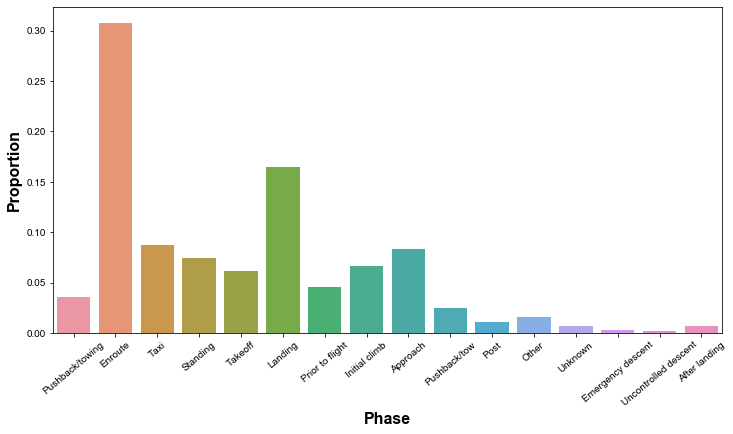

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

proportion = np.array(list(counter.values()))/sum(list(counter.values()))

plt.figure(figsize = (12, 6))
sns.barplot(x = list(counter.keys()), y = proportion)
sns.set(font_scale=1)
plt.xticks(rotation=40)
plt.xlabel('Phase', fontsize = 16, fontweight = 'bold')
plt.ylabel('Proportion', fontsize = 16, fontweight = 'bold')

#### Create raw transition graph from the Table Events_Sequence

In [142]:
nodeDesp = list(df_events_sequences['Description'].unique())

NameError: name 'df_events_sequences' is not defined

In [143]:
def findDespByID(ID):
    desp = df_events_sequences.loc[df_events_sequences['ev_id'] == ID]
    return list(desp['Description'])

dictEdges = {}

for ID in df_events_sequences['ev_id']:
    desp = findDespByID(ID)
    
    if len(desp) == 1:
        nodeFrom = nodeDesp.index(desp[0])
        nodeTo = nodeDesp.index(desp[0])
        
        key = str(nodeFrom)
        
        if key in dictEdges.keys():
            dictEdges[key] = dictEdges[key] + 1  
        else:
            dictEdges[key] = 1    
    else:
        for i in range(len(desp) - 1):
            nodeFrom = nodeDesp.index(desp[i])
            nodeTo = nodeDesp.index(desp[i+1])

            key = str(nodeFrom) + '->' + str(nodeTo)
            
            if key in dictEdges.keys():
                dictEdges[key] = dictEdges[key] + 1
            else:
                dictEdges[key] = 1

NameError: name 'df_events_sequences' is not defined

In [41]:
import operator

sorted_x = sorted(dictEdges.items(), key=operator.itemgetter(1))

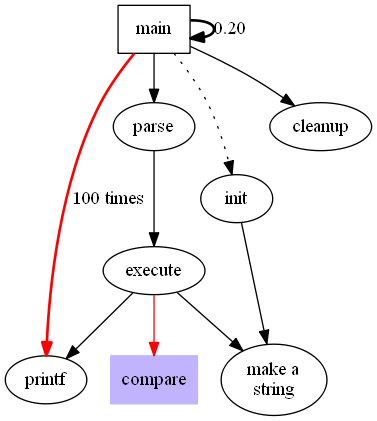

In [43]:
g1 = """digraph top {
    size ="12,12";
    main [shape=box]; /* this is a comment */
    main -> parse [weight=80];
    main -> main [style=bold, label="0.20"];
    parse -> execute;
    main -> init [style=dotted];
    main -> cleanup;
    execute -> { make_string; printf}
    init -> make_string;
    edge [color=red]; // so is this
    main -> printf [style=bold,label="100 times"];
    make_string [label="make a\nstring"];
    node [shape=box,style=filled,color=".7 .3 1.0"];
    execute -> compare;
}"""


drawImage(g1)

In [44]:
def create_graph():
    g = """digraph top {
    size ="12,12";"""
    
    for key, value in dictEdges.items():
        
        if '->' in key:
            nodeFrom = key.split('->')[0]
            nodeTo = key.split('->')[1]
            g += str(nodeFrom) + '->' + str(nodeTo) + '[style=bold, label=' + str(value) + ']'
  
    g += '}'
    
    return g

In [45]:
nodeDesp[21]

'Fire/smoke (non-impact)'

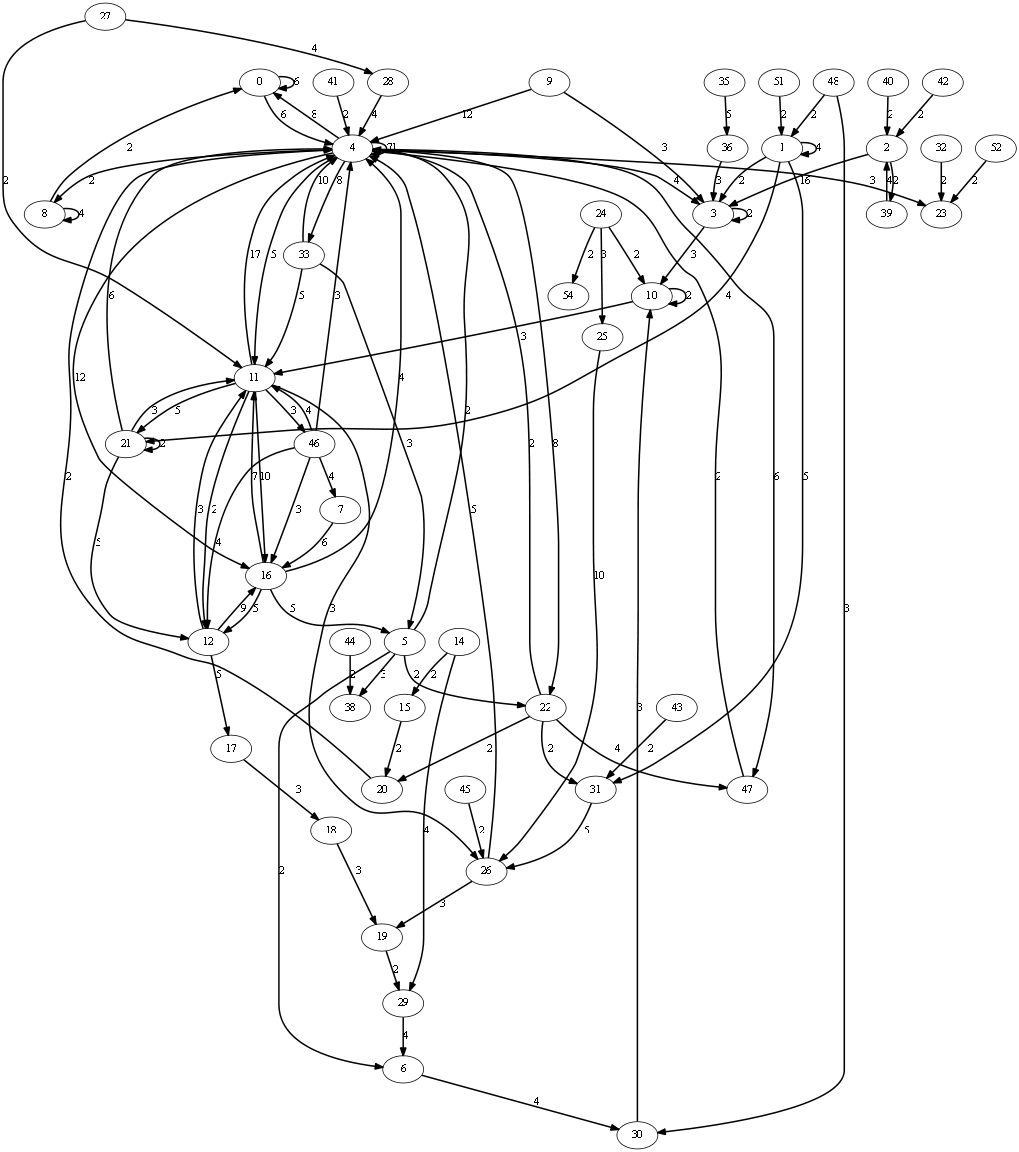

In [46]:
g = create_graph()
drawPDF(g, 'test')
drawImage(g)

#### Create compressed network from Table seq_of_events

In [47]:
initialIDs = set(occurrences['ev_id']).intersection(set(seq_of_events['ev_id']))
part120_IDs = set(sum(aircraft.values.tolist(), []))

ev_ID = list(initialIDs.intersection(part120_IDs))

In [48]:
eventCodes.head()

,code,meaning
0,100,ABRUPT MANEUVER
1,110,"ALTITUDE DEVIATION,UNCONTROLLED"
2,120,CARGO SHIFT
3,130,AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION
4,131,PROPELLER FAILURE/MALFUNCTION


In [91]:
df_seq_of_events = seq_of_events[seq_of_events['ev_id'].isin(ev_ID)].copy()

df_seq_of_events.drop(df_seq_of_events.index[6218], inplace = True)
df_seq_of_events.reset_index(inplace=True)
del df_seq_of_events['index']

In [92]:
df_seq_of_events.head()

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
0,20030314X00332,1,1,1,1,10403,C,1137,0.0,7/6/2004 15:23:06,JOHB
1,20001212X18554,1,1,1,2,24602,F,3130,4000.0,1/10/2001 10:43:11,dbo
2,20001212X18554,1,1,2,2,24608,C,3130,4111.0,1/10/2001 10:43:11,dbo
3,20001212X18554,1,1,3,4,90000,F,0,6110.0,1/10/2001 10:43:11,dbo
4,20001212X18554,1,1,4,2,24604,F,3134,4111.0,1/10/2001 10:43:11,dbo


In [93]:
df_seq_of_events.insert(6, 'Grouped_Subject_Code', None)
df_seq_of_events.insert(7, 'Simple_Subject_Code', None)

In [94]:
df_seq_of_events['Grouped_Subject_Code'] = df_seq_of_events['Subj_Code'].copy()
df_seq_of_events['Simple_Subject_Code'] = df_seq_of_events['Subj_Code'].copy()

def updateGroupSubjectCode(code):
    codeList = []
    
    if int(str(code)[:-2] + '00') in codeList:
        return code
    else:
        return int(str(code)[:-2] + '00')

df_seq_of_events['Grouped_Subject_Code'] = df_seq_of_events['Grouped_Subject_Code'].map(updateGroupSubjectCode)
df_seq_of_events['Simple_Subject_Code'] = df_seq_of_events['Subj_Code'].map(updateGroupSubjectCode)

In [95]:
df_seq_of_events.head()

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Grouped_Subject_Code,Simple_Subject_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
0,20030314X00332,1,1,1,1,10403,10400,10400,C,1137,0.0,7/6/2004 15:23:06,JOHB
1,20001212X18554,1,1,1,2,24602,24600,24600,F,3130,4000.0,1/10/2001 10:43:11,dbo
2,20001212X18554,1,1,2,2,24608,24600,24600,C,3130,4111.0,1/10/2001 10:43:11,dbo
3,20001212X18554,1,1,3,4,90000,90000,90000,F,0,6110.0,1/10/2001 10:43:11,dbo
4,20001212X18554,1,1,4,2,24604,24600,24600,F,3134,4111.0,1/10/2001 10:43:11,dbo


In [96]:
eventCodes[eventCodes['code'] == 31100]

,code,meaning


In [97]:
def findKeyByValue(val, highLevelGroup):
    for k, v in highLevelGroup.items():
        if val in v:
            return k
        
def mapToHigherLevel(code):
    
    highLevelGroup = {
        9910001: [10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 11300, 13000],
        9912001: [12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13100],
        9913001: [14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200,
                  15300, 15400, 15600, 15700, 15800, 15900, 16000, 16700, 16900],
        9914001: [17000, 17100, 17200, 17300],
        9915001: [18100, 18200, 18300, 18400, 18500, 19000, 19300],
        9916001: [21000, 21100],
        9918001: [19200, ],
        9919001: [20200],
        9920001: [20000],
        9930001: [20100],
        9940001: [22000, 22100, 22200, 22300, 22400, 22500, 22600, 22700, 22800, 22900, 23000, 23100, 23300],
        9950001: [24000, 24100, 24200, 24300, 24400, 24500, 24600, 24700, 25000],
        9960001: [30000, 30001, 31000, 31100, 31200, 32000, 33000, 33100, 34000, 
                  33200, 33400, 33500, 33600, 33700, 34100, 34200, 34300, 40000, 40001, 50001, 60000],
        9970001: [35000, 35100, 35200, 35300, 70100, 80100, 80200, 80300, 80400, 84100, 84200,
                  70000, 80000, 82000, 82100, 82200, 84000],
        9980001: [90000, 91000, 92000, 93000, 90100, 90200, 91100, 91200, 91300, 91400, 91500, 92200, 92300, 92400, 
                  93100, 93200, 93300]
    }
    
    
    allValues = sum(list(highLevelGroup.values()), [])
    
    if code in allValues:
        key = findKeyByValue(code, highLevelGroup)
        return key
    else:
        return code
    
df_seq_of_events['Grouped_Subject_Code'] = df_seq_of_events['Grouped_Subject_Code'].map(mapToHigherLevel)

In [98]:
df_seq_of_events.head(2)

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Grouped_Subject_Code,Simple_Subject_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
0,20030314X00332,1,1,1,1,10403,9910001,10400,C,1137,0.0,7/6/2004 15:23:06,JOHB
1,20001212X18554,1,1,1,2,24602,9950001,24600,F,3130,4000.0,1/10/2001 10:43:11,dbo


In [99]:
subjectCodes = sorted(list(df_seq_of_events['Grouped_Subject_Code'].unique()))

In [100]:
df_seq_of_events.head(3)

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Grouped_Subject_Code,Simple_Subject_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
0,20030314X00332,1,1,1,1,10403,9910001,10400,C,1137,0.0,7/6/2004 15:23:06,JOHB
1,20001212X18554,1,1,1,2,24602,9950001,24600,F,3130,4000.0,1/10/2001 10:43:11,dbo
2,20001212X18554,1,1,2,2,24608,9950001,24600,C,3130,4111.0,1/10/2001 10:43:11,dbo


In [101]:
def findEventSequence(ev_id):
    seqs = df_seq_of_events.loc[df_seq_of_events['ev_id'] == ev_id][['seq_event_no', 'Grouped_Subject_Code']]
    return seqs.drop_duplicates(subset = ['seq_event_no', 'Grouped_Subject_Code'])

def findEventOutcomes(ev_id):
    outcomes = occurrences.loc[occurrences['ev_id'] == ev_id][['Occurrence_No', 'Occurrence_Code']].copy()
    return outcomes.drop_duplicates(subset = ['Occurrence_No', 'Occurrence_Code'])


dictEventSequences = {}
for ID in ev_ID:
    
    seq = findEventSequence(ID)
    leafNodes = []

    if len(seq) > 0:
        for i in range(len(seq) - 1):
            if seq.iloc[i]['seq_event_no'] < seq.iloc[i+1]['seq_event_no']:
                codeFrom = seq.iloc[i]['Grouped_Subject_Code']
                codeTo = seq.iloc[i+1]['Grouped_Subject_Code']

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictEventSequences.keys():
                    dictEventSequences[key] += 1
                else:
                    dictEventSequences[key] = 1 
            else:
                leafNodes.append(seq.iloc[i]['Grouped_Subject_Code'])


        leafNodes.append(seq.iloc[-1]['Grouped_Subject_Code'])
        outcomes = findEventOutcomes(ID)

        ## connect leaft Nodes with event outcomes:
        for i in leafNodes:
            codeFrom = i
            codeTo = outcomes.iloc[0]['Occurrence_Code']

            key = str(codeFrom) + '->' + str(codeTo)
            if key in dictEventSequences.keys():
                dictEventSequences[key] += 1
            else:
                dictEventSequences[key] = 1

        outcomeLens = outcomes.shape[0]

        if outcomeLens > 1:
            for i in range(outcomeLens - 1):
                codeFrom = outcomes.iloc[i]['Occurrence_Code']
                codeTo = outcomes.iloc[i+1]['Occurrence_Code']

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictEventSequences.keys():
                    dictEventSequences[key] += 1
                else:
                    dictEventSequences[key] = 1

In [102]:
def createBN():
    occurrencesCodes = list(set(occurrences['Occurrence_Code']))
    
    g = """digraph top {
    \tsize ="12,12"; \n \t"""
    
    g += """bgcolor="transparent"; \n """
    g_node_style = ''
    
    threshold = 10
    
    count = 0
    for key, value in dictEventSequences.items():
        
        #if count < 100:
        if '->' in key:
            nodeFrom = int(key.split('->')[0])
            nodeTo = int(key.split('->')[1])

            #if nodeFrom != nodeTo:
            #    print (nodeFrom, '-->', nodeTo)

            if nodeFrom in occurrencesCodes and value > threshold:
                g += str(nodeFrom) + '->' + str(nodeTo) + ' [label=' + str(value) + ', fontsize=16, penwidth=3, \
                color = white, fontcolor = white, fontsize = 16]'
                g += '\n\t'

                g_node_style += str(nodeFrom) + """ [style=filled, color="gold"]"""
                g_node_style += '\n\t'
            elif nodeTo in occurrencesCodes and value > threshold:
                g += str(nodeFrom) + '->' + str(nodeTo) + ' [label=' + str(value) + ', fontsize=16, penwidth=3, \
                color = white, fontcolor = white, fontsize = 16]'
                g += '\n\t'

                g_node_style += str(nodeTo) + """ [style=filled, color="gold"]"""
                g_node_style += '\n\t'
            elif value > threshold:
                g += str(nodeFrom) + '->' + str(nodeTo) + ' [style=bold, label=' + str(value) + ', fontsize=16, \
                            penwidth=3, color = white, fontcolor = white, fontsize = 16]'
                g += '\n\t'
                
                g_node_style += str(nodeTo) + """ [style=filled, color="green", fontsize = 16]"""
                g_node_style += '\n\t'

            #count += 1
      
    g += g_node_style
    g = g[:-1]
    g += '}'
    
    return g

In [103]:
len(subjectCodes)

15

In [104]:
eventCodes[eventCodes['code'] == 10001]

,code,meaning
633,10001,"FUSELAGE,CREW COMPARTMENT"


In [105]:
subjectCodes

[9910001,
 9912001,
 9913001,
 9914001,
 9915001,
 9916001,
 9918001,
 9919001,
 9920001,
 9930001,
 9940001,
 9950001,
 9960001,
 9970001,
 9980001]

In [106]:
dictSubjectCodes = {}
for i in range(1, len(subjectCodes)+1):
    dictSubjectCodes[subjectCodes[i-1]] = i

In [107]:
dictEventSequences

{'9920001->9950001': 148,
 '9950001->240': 93,
 '9910001->9910001': 216,
 '9910001->130': 200,
 '9910001->9950001': 182,
 '9950001->9910001': 91,
 '9940001->130': 27,
 '130->320': 5,
 '9913001->9914001': 18,
 '9914001->9950001': 48,
 '9950001->9950001': 669,
 '9950001->171': 19,
 '171->430': 10,
 '9920001->240': 136,
 '9950001->430': 112,
 '9970001->430': 14,
 '9980001->430': 4,
 '430->430': 11,
 '9950001->130': 182,
 '130->230': 8,
 '9912001->140': 2,
 '9912001->9950001': 68,
 '130->340': 6,
 '9920001->9940001': 47,
 '9940001->240': 55,
 '9913001->130': 45,
 '9913001->9913001': 166,
 '130->351': 5,
 '351->171': 9,
 '9919001->9950001': 70,
 '9950001->9920001': 67,
 '9920001->9920001': 147,
 '9920001->310': 6,
 '9960001->9950001': 66,
 '9940001->160': 2,
 '9950001->160': 24,
 '9950001->9919001': 42,
 '9919001->360': 1,
 '9919001->310': 53,
 '9950001->310': 119,
 '9912001->9912001': 122,
 '9912001->130': 88,
 '9940001->9940001': 52,
 '9940001->9950001': 66,
 '9915001->9918001': 4,
 '9914

In [108]:
eventCodes[eventCodes['code'] == 320]

,code,meaning
37,320,ON GROUND/WATER ENCOUNTER WITH TERRAIN/WATER


In [109]:
eventCodes.head()

,code,meaning
0,100,ABRUPT MANEUVER
1,110,"ALTITUDE DEVIATION,UNCONTROLLED"
2,120,CARGO SHIFT
3,130,AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION
4,131,PROPELLER FAILURE/MALFUNCTION


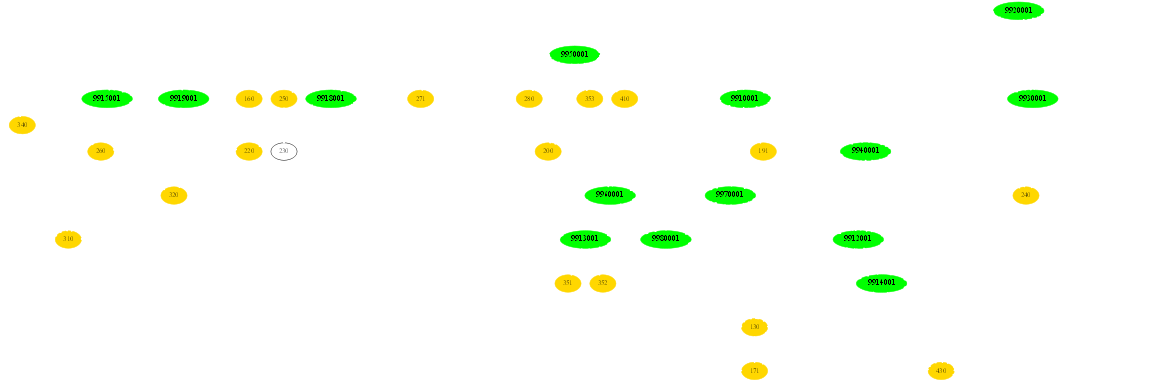

In [119]:
BN = createBN()
drawImage(BN)

In [118]:
drawPDF(BN, 'BN')

### Challenges:

#### 1. How to detect loop in the constructed graph
#### 2. How to break the loop
#### 3. Visualization --> too many nodes

In [320]:
df_seq_of_events.head()

,ev_id,Aircraft_Key,Occurrence_No,seq_event_no,group_code,Subj_Code,Grouped_Subject_Code,Simple_Subject_Code,Cause_Factor,Modifier_Code,Person_Code,lchg_date,lchg_userid
0,20030314X00332,1,1,1,1,10403,9910001,10400,C,1137,0.0,7/6/2004 15:23:06,JOHB
1,20001212X18554,1,1,1,2,24602,9950001,24600,F,3130,4000.0,1/10/2001 10:43:11,dbo
2,20001212X18554,1,1,2,2,24608,9950001,24600,C,3130,4111.0,1/10/2001 10:43:11,dbo
3,20001212X18554,1,1,3,4,90000,9980001,90000,F,0,6110.0,1/10/2001 10:43:11,dbo
4,20001212X18554,1,1,4,2,24604,9950001,24600,F,3134,4111.0,1/10/2001 10:43:11,dbo


In [321]:
def findEventSequenceSimpleCode(ev_id):
    seqs = df_seq_of_events.loc[df_seq_of_events['ev_id'] == ev_id][['seq_event_no', 'Simple_Subject_Code']]
    return seqs.drop_duplicates(subset = ['seq_event_no', 'Simple_Subject_Code'])

def findEventOutcomesSimpleCode(ev_id):
    outcomes = occurrences.loc[occurrences['ev_id'] == ev_id][['Occurrence_No', 'Occurrence_Code']].copy()
    return outcomes.drop_duplicates(subset = ['Occurrence_No', 'Occurrence_Code'])

In [322]:
dictBN = {}
nodeList = []

for ID in ev_ID:
    
    seq = findEventSequenceSimpleCode(ID)
    leafNodes = []

    if len(seq) > 0:
        for i in range(len(seq) - 1):
            if seq.iloc[i]['seq_event_no'] < seq.iloc[i+1]['seq_event_no']:
                codeFrom = seq.iloc[i]['Simple_Subject_Code']
                codeTo = seq.iloc[i+1]['Simple_Subject_Code']
                
                nodeList.append(codeFrom)
                nodeList.append(codeTo)

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictBN.keys():
                    dictBN[key] += 1
                else:
                    dictBN[key] = 1 
            else:
                leafNodes.append(seq.iloc[i]['Simple_Subject_Code'])

        leafNodes.append(seq.iloc[-1]['Simple_Subject_Code'])
        outcomes = findEventOutcomesSimpleCode(ID)

        ## connect leaft Nodes with event outcomes:
        for i in leafNodes:
            codeFrom = i
            codeTo = outcomes.iloc[0]['Occurrence_Code']
            
            nodeList.append(codeFrom)
            nodeList.append(codeTo)

            key = str(codeFrom) + '->' + str(codeTo)
            if key in dictBN.keys():
                dictBN[key] += 1
            else:
                dictBN[key] = 1

        outcomeLens = outcomes.shape[0]

        if outcomeLens > 1:
            for i in range(outcomeLens - 1):
                codeFrom = outcomes.iloc[i]['Occurrence_Code']
                codeTo = outcomes.iloc[i+1]['Occurrence_Code']
                
                nodeList.append(codeFrom)
                nodeList.append(codeTo)

                key = str(codeFrom) + '->' + str(codeTo)

                if key in dictBN.keys():
                    dictBN[key] += 1
                else:
                    dictBN[key] = 1

#### Construct transition matrix

In [46]:
#### Label each node with a sequential number
#### Detect loops in the network 
#### Find the direction of observed node --> consequence

import networkx as nx
G = nx.DiGraph()

count = len(set(nodeList)) 
nodeIDList = list(set(nodeList))
TP = np.zeros(shape = (count, count))
    
## add node
for i in range(1, count):
    G.add_node(i)

## add edges
for i in dictBN:
    nodeFrom, nodeTo = int(i.split('->')[0]), int(i.split('->')[1])
    #print (nodeFrom, nodeTo)
    #if nodeFrom != nodeTo:
        #print (str(nodeFrom) + '->' + str(nodeTo))
        #print (dictBN[str(nodeFrom) + '->' + str(nodeTo)])
    G.add_edge(nodeFrom, nodeTo)
        
    if nodeTo == 290:
        #pass
        print (str(nodeFrom) + '->' + str(nodeTo), dictBN[i])
        
    TP[nodeIDList.index(nodeFrom), nodeIDList.index(nodeTo)] = dictBN[i]
    
    #print (nodeIDList.index(nodeFrom), nodeIDList.index(nodeTo), dictBN[i])
    
    if nodeIDList.index(nodeFrom) == 1:
        pass
        #print (nodeIDList.index(nodeFrom))

192->290 1
196->290 1
130->290 1


In [47]:
TP

array([[6., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 6., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 5., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [48]:
N = TP.shape[0]

for i in range(TP.shape[0]):
    if sum(TP[i, :]) == 0:
        TP[i, i] = 1

In [49]:
row_sums = TP.sum(axis=1)
TP = TP / row_sums[:, np.newaxis]

In [50]:
nodeIDs = set(nodeList)

for id in nodeIDs:
    try:
        res = nx.find_cycle(G, source = id, orientation='original')
        if id == res[0][0]:
            print (res)
    except:
        pass

[(12800, 12800, 'forward')]
[(24700, 80000, 'forward'), (80000, 91300, 'forward'), (91300, 24700, 'forward')]
[(80000, 91300, 'forward'), (91300, 24700, 'forward'), (24700, 80000, 'forward')]
[(130, 230, 'forward'), (230, 340, 'forward'), (340, 310, 'forward'), (310, 192, 'forward'), (192, 130, 'forward')]
[(140, 140, 'forward')]
[(10400, 10400, 'forward')]
[(160, 200, 'forward'), (200, 160, 'forward')]
[(91300, 24700, 'forward'), (24700, 80000, 'forward'), (80000, 91300, 'forward')]
[(192, 130, 'forward'), (130, 230, 'forward'), (230, 340, 'forward'), (340, 310, 'forward'), (310, 192, 'forward')]
[(200, 160, 'forward'), (160, 200, 'forward')]
[(12500, 12500, 'forward')]
[(230, 340, 'forward'), (340, 310, 'forward'), (310, 192, 'forward'), (192, 130, 'forward'), (130, 230, 'forward')]
[(310, 192, 'forward'), (192, 130, 'forward'), (130, 230, 'forward'), (230, 340, 'forward'), (340, 310, 'forward')]
[(12100, 31100, 'forward'), (31100, 12100, 'forward')]
[(340, 310, 'forward'), (310, 192

### Forward propagation

In [51]:
set(df_seq_of_events['Simple_Subject_Code'])

{10000,
 10100,
 10200,
 10300,
 10400,
 10500,
 10600,
 10700,
 10800,
 11300,
 12000,
 12100,
 12200,
 12300,
 12400,
 12500,
 12600,
 12700,
 12800,
 12900,
 13000,
 13100,
 14000,
 14100,
 14200,
 14300,
 14400,
 14500,
 14600,
 14700,
 14800,
 14900,
 15000,
 15100,
 15200,
 15300,
 15400,
 15600,
 15700,
 15800,
 15900,
 16000,
 16700,
 16900,
 17000,
 17100,
 17200,
 17300,
 18100,
 18200,
 18300,
 18400,
 18500,
 19000,
 19200,
 19300,
 20000,
 20100,
 20200,
 21000,
 21100,
 22000,
 22100,
 22200,
 22300,
 22400,
 22500,
 22600,
 22700,
 22800,
 22900,
 23000,
 23100,
 23300,
 24000,
 24100,
 24200,
 24300,
 24400,
 24500,
 24600,
 24700,
 25000,
 30000,
 31100,
 31200,
 32000,
 33000,
 33100,
 33200,
 33400,
 33500,
 33600,
 33700,
 34000,
 34100,
 34200,
 34300,
 35000,
 35100,
 35200,
 35300,
 40000,
 60000,
 70000,
 70100,
 80000,
 80100,
 80200,
 80300,
 80400,
 82000,
 82100,
 82200,
 84000,
 84100,
 84200,
 90000,
 90100,
 90200,
 91000,
 91100,
 91200,
 91300,
 91400,


In [52]:
state = 22600
eventCodes[eventCodes['code']== state]

,code,meaning
1741,22600,ANTI-ICE/DEICE SYSTEM


In [53]:
initialState = np.zeros(shape = (N, 1)).flatten()

startNodeID = nodeIDList.index(state)
initialState[startNodeID] = 1

In [54]:
startNode = [state]

In [55]:
dictForwardGraph = {}

for i in range(1000):
    initialState = np.dot(TP.transpose(), initialState)
    
    #print (nodeIDList[np.argmax(initialState)])
    #print (initialState[[41, 66, 69, 109]])
    
    for s in startNode:
        # calculate the sum of all counts
        count = 0
        for key, val in dictBN.items():
            if str(s) + '->' in key:
                count = count + val

        startNode = []
        for key, val in dictBN.items():
            if str(s) + '->' in key and val/count > 0.05:
                t = key.split('->')[1]
                
                startNode.append(t)
                
                dictForwardGraph[str(s) + '->' + str(t)] = val/count

In [56]:
def createFowardPropagation(FPN):
    
    g = """digraph top {
    \tsize ="12,12"; \n \t"""

    g_node_style = ''
    
    for key, value in FPN.items():

        if '->' in key:
            nodeFrom = int(key.split('->')[0])
            nodeTo = int(key.split('->')[1])
            g += str(nodeFrom) + '->' + str(nodeTo) + ' [label=' + str(round(value, 2)) + ']'
            g += '\n\t'
      
    g += g_node_style
    g = g[:-1]
    g += '}'
    
    return g

In [57]:
FPN = createFowardPropagation(dictForwardGraph)
drawImage(FPN)
drawPDF(FPN, 'FPN')

In [58]:
eventIndices = np.where(initialState > 0.001)

dictOutcome = {}

for i in list(eventIndices[0]):
    code = nodeIDList[i]
    meaning = eventCodes[eventCodes['code']== code]['meaning']
    p = initialState[i]
    
    dictOutcome[code] = p

In [59]:
dictOutcome

{0: 0.012270664217011644,
 140: 0.10466378306330312,
 150: 0.02735200547416189,
 195: 0.027578118071082645,
 232: 0.08676583710364927,
 290: 0.7264354854715852,
 370: 0.01476748909941251}

Text(0, 0.5, 'Probability of occurrence')

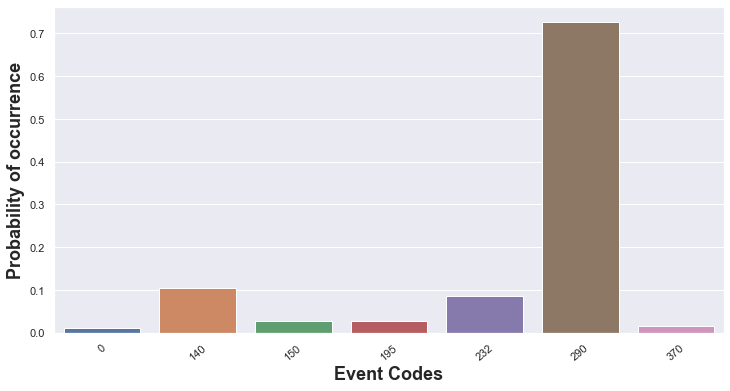

In [60]:
plt.figure(figsize = (12, 6))

sns.barplot(x = list(dictOutcome.keys()), y = list(dictOutcome.values()))
sns.set(font_scale=1)
plt.xticks(rotation=40)

plt.xlabel('Event Codes', fontsize = 18, fontweight = 'bold')
plt.ylabel('Probability of occurrence', fontsize = 18, fontweight = 'bold')

In [61]:
eventCodes[eventCodes['code']== 0]

,code,meaning


### Backward inference

In [62]:
TP = np.array([[0.2, 0.2, 0.6], [0, 0.7, 0.3], [0.5, 0.5, 0]])

In [63]:
s = np.array([0.2, 0.6, 0.2])

In [64]:
for i in range(1000):
    s = np.dot(TP.transpose(), s)
    s = s/np.sum(s)

In [65]:
s

array([0.16853933, 0.56179775, 0.26966292])

In [66]:
tmp = TP.transpose()
for i in range(100):
    tmp = np.dot(TP.transpose(), tmp)

In [67]:
tmp

array([[0.16853933, 0.16853933, 0.16853933],
       [0.56179775, 0.56179775, 0.56179775],
       [0.26966292, 0.26966292, 0.26966292]])

In [68]:
np.dot(tmp, s)

array([0.16853933, 0.56179775, 0.26966292])